## IMPORT NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import regex as re

## GET AND READ CSV

In [2]:
musicBg = pd.read_csv('Music Background.csv')
setA = pd.read_csv('Set A.csv')
setB = pd.read_csv('Set B.csv')
setC = pd.read_csv('Set C.csv')
setD = pd.read_csv('Set D.csv')
setE = pd.read_csv('Set E.csv')
setF = pd.read_csv('Set F.csv')
setG = pd.read_csv('Set G.csv')
setH = pd.read_csv('Set H.csv')
setI = pd.read_csv('Set I.csv')
setJ = pd.read_csv('Set J.csv')

# musicBg = pd.read_csv('CROWDSOURCE\Music Background.csv')
# setA = pd.read_csv('CROWDSOURCE\Set A.csv')
# setB = pd.read_csv('CROWDSOURCE\Set B.csv')
# setC = pd.read_csv('CROWDSOURCE\Set C.csv')
# setD = pd.read_csv('CROWDSOURCE\Set D.csv')
# setE = pd.read_csv('CROWDSOURCE\Set E.csv')
# setF = pd.read_csv('CROWDSOURCE\Set F.csv')
# setG = pd.read_csv('CROWDSOURCE\Set G.csv')
# setH = pd.read_csv('CROWDSOURCE\Set H.csv')
# setI = pd.read_csv('CROWDSOURCE\Set I.csv')
# setJ = pd.read_csv('CROWDSOURCE\Set J.csv')

setA.head()

,Timestamp,Email Address,Song Familiarity,Artist Familiarity,Affective Response\n[bad-good],Affective Response\n[distasteful-tasty],Affective Response\n[dull-exciting],Affective Response\n[tasteless-tasteful],Affective Response\n[unimaginative-creative],Affective Response\n[untalented-talented],...,Affective Response\n[dull-exciting].4,Affective Response\n[tasteless-tasteful].4,Affective Response\n[unimaginative-creative].4,Affective Response\n[untalented-talented].4,Affective Response\n[unpleasant-pleasant].4,Affective Response\n[forgettable-memorable].4,Affective Response\n[boring-interesting].4,"Need to Re-experience\n[""I want to listen to similar songs as this song""].4","Need to Re-experience\n[""I would like to share this song to my friends""].4","Need to Re-experience\n[""I would love to add this to my playlist""].4"
0,2/1/2023 8:37:00,alyssandra_lemen@dlsu.edu.ph,6,6,6,6,6,6,7,7,...,7,7,7,7,7,6,7,Agree,Neutral,Agree
1,2/1/2023 11:06:17,nehro_ranay@dlsu.edu.ph,6,7,6,6,4,6,6,6,...,5,5,4,4,4,4,5,Neutral,Neutral,Neutral
2,2/6/2023 15:55:56,zoe_avila@dlsu.edu.ph,5,1,2,3,2,4,6,4,...,7,5,6,6,7,5,6,Agree,Somewhat Agree,Somewhat Agree
3,2/7/2023 8:45:00,yonnabmnglg@gmail.com,7,6,7,5,5,5,6,6,...,7,6,7,7,7,7,7,Strongly Agree,Strongly Agree,Strongly Agree
4,2/7/2023 14:16:55,louis_aboy@dlsu.edu.ph,7,1,6,5,6,5,4,5,...,5,5,6,5,5,6,5,Somewhat Agree,Somewhat Agree,Somewhat Agree


### Organizing crowdsourced data for each song

In [3]:
# song names and artist names for each set

setA_songNames = ["Kill Bill", "Until I Found You (with Em Beihold) - Em Beihold Version", "THE SHADE", "Glimpse of Us", "OMG"]
setA_artistNames = ["SZA", "Stephen Sanchez, Em Beihold", "Rex Orange County", "Joji", "NewJeans"]

setB_songNames = ["Mahika", "Midnight Rain", "Isa lang", "I Wanna Be Yours", "Yakap"]
setB_artistNames = ["Adie, Janine Berdin", "Taylor Swift", "Arthur Nery", "Arctic Monkeys", "Zack Tabuldo"]

setC_songNames = ["Anti-Hero", "Umaasa", "Left and Right (Feat. Jung Kook of BTS)", "golden hour", "Kagome"]
setC_artistNames = ["Taylor Swift", "Calein", "Charlie Puth, Jung Kook, BTS", "JVKE", "Lo ki"]

setD_songNames = ["Here With Me", "Fallen", "ANTIFRAGILE", "Angel Baby", "Shirt"]
setD_artistNames = ["d4vd", "Lola Amour", "LE SSERAFIM", "Troye Sivan", "SZA"]

setE_songNames = ["Ditto", "Die For You", "Old Love", "Sure Thing", "Muli"]
setE_artistNames = ["NewJeans", "The Weeknd", "yuji, putri dahlia", "Miguel", "Ace Banzuelo"]

setF_songNames = ["Made You Look", "As It Was", "City Girl", "Pagsamo", "double take"]
setF_artistNames = ["Meghan Trainor", "Harry Styles", "Shanti Dope", "Arthur Nery", "dhruv"]

setG_songNames = ["Wet The Bed (feat. Ludacris)", "Ikaw Lang", "Paraluman", "Creepin’ (with The Weeknd & 21 Savage)", "Kumpas - Theme of “2 Good 2 Be True”"]
setG_artistNames = ["Chris Brown, Ludacris", "NOBITA", "Adie", "Metro Boomin, The Weeknd, 21 Savage", "Moira Dela Torre"]

setH_songNames = ["Unholy (feat. Kim Petras)", "Jopay", "Bahala Na", "Shinunoga E-Wa", "Shut Down"]
setH_artistNames = ["Sam Smith, Kim Petras", "Mayonnaise", "Kenaniah", "Fujii Kaze", "BLACKPINK"]

setI_songNames = ["Under The Influence", "Die For You", "Nobody Gets Me", "Hype Boy", "Until I Found You"]
setI_artistNames = ["Chris Brown", "Joji", "SZA", "NewJeans", "Stephen Sanchez"]

setJ_songNames = ["Babalik Sa’yo (from “2 Good 2 Be True”)", "Fall In Love Alone", "Pano", "Pasilyo", "Tahanan"]
setJ_artistNames = ["Moira Dela Torre", "Stacey Ryan", "Zack Tabuldo", "SunKissed Lola", "Adie"]

In [4]:
# creation of dataframe

crowdsource = {'Song Name':setA_songNames[0], 'Artist Name':setA_artistNames[0], 'Song Familiarity':[list(setA["Song Familiarity"])], 'Artist Familiarity':[list(setA["Artist Familiarity"])], 'AR[bad-good]':[list(setA["Affective Response\n[bad-good]"])], 'AR[distasteful-tasty]':[list(setA["Affective Response\n[distasteful-tasty]"])], "AR[dull-exciting]":[list(setA["Affective Response\n[dull-exciting]"])], "AR[tasteless-tasteful]":[list(setA["Affective Response\n[tasteless-tasteful]"])], "AR[unimaginative-creative]":[list(setA["Affective Response\n[unimaginative-creative]"])], "AR[untalented-talented]":[list(setA["Affective Response\n[untalented-talented]"])], "AR[unpleasant-pleasant]":[list(setA["Affective Response\n[unpleasant-pleasant]"])], "AR[forgettable-memorable]":[list(setA["Affective Response\n[forgettable-memorable]"])],"AR[boring-interesting]":[list(setA["Affective Response\n[boring-interesting]"])], "NR[listen to similar songs]":[list(setA["Need to Re-experience\n[\"I want to listen to similar songs as this song\"]"])], "NR[share to my friends]":[list(setA["Need to Re-experience\n[\"I would like to share this song to my friends\"]"])], "NR[add to my playlist]":[list(setA["Need to Re-experience\n[\"I would love to add this to my playlist\"]"])]}
crowdsource_pd = pd.DataFrame(crowdsource)
crowdsource_pd

,Song Name,Artist Name,Song Familiarity,Artist Familiarity,AR[bad-good],AR[distasteful-tasty],AR[dull-exciting],AR[tasteless-tasteful],AR[unimaginative-creative],AR[untalented-talented],AR[unpleasant-pleasant],AR[forgettable-memorable],AR[boring-interesting],NR[listen to similar songs],NR[share to my friends],NR[add to my playlist]
0,Kill Bill,SZA,"[6, 6, 5, 7, 7, 5, 5, 1, 6, 2, 2, 7, 4, 7, 1, ...","[6, 7, 1, 6, 1, 5, 5, 1, 4, 3, 2, 7, 5, 3, 2, ...","[6, 6, 2, 7, 6, 6, 6, 5, 5, 7, 4, 7, 6, 6, 4, ...","[6, 6, 3, 5, 5, 5, 6, 4, 4, 7, 4, 7, 6, 5, 4, ...","[6, 4, 2, 5, 6, 6, 6, 2, 4, 7, 4, 5, 5, 5, 3, ...","[6, 6, 4, 5, 5, 5, 6, 4, 4, 7, 4, 7, 5, 5, 4, ...","[7, 6, 6, 6, 4, 6, 6, 3, 5, 7, 3, 7, 5, 5, 3, ...","[7, 6, 4, 6, 5, 6, 6, 5, 5, 7, 4, 7, 7, 5, 6, ...","[6, 6, 5, 7, 4, 6, 6, 4, 5, 7, 5, 7, 5, 6, 4, ...","[7, 6, 3, 6, 6, 7, 6, 1, 4, 7, 3, 7, 5, 5, 3, ...","[5, 5, 7, 7, 6, 6, 6, 2, 5, 7, 4, 7, 5, 6, 3, ...","[Agree, Somewhat Agree, Somewhat Agree, Strong...","[Somewhat Agree, Somewhat Agree, Disagree, Str...","[Agree, Somewhat Agree, Somewhat Agree, Strong..."


In [5]:
# addition of the rest of Set A to dataframe

ctr = 1
while ctr != 5:
    df = {'Song Name':setA_songNames[ctr], 'Artist Name':setA_artistNames[ctr], 'Song Familiarity':list(setA["Song Familiarity."+str(ctr)]), 'Artist Familiarity':list(setA["Artist Familiarity."+str(ctr)]), 'AR[bad-good]':list(setA["Affective Response\n[bad-good]."+str(ctr)]), 'AR[distasteful-tasty]':list(setA["Affective Response\n[distasteful-tasty]."+str(ctr)]), "AR[dull-exciting]":list(setA["Affective Response\n[dull-exciting]."+str(ctr)]), "AR[tasteless-tasteful]":list(setA["Affective Response\n[tasteless-tasteful]."+str(ctr)]), "AR[unimaginative-creative]":list(setA["Affective Response\n[unimaginative-creative]."+str(ctr)]), "AR[untalented-talented]":list(setA["Affective Response\n[untalented-talented]."+str(ctr)]), "AR[unpleasant-pleasant]":list(setA["Affective Response\n[unpleasant-pleasant]."+str(ctr)]), "AR[forgettable-memorable]":list(setA["Affective Response\n[forgettable-memorable]."+str(ctr)]),"AR[boring-interesting]":list(setA["Affective Response\n[boring-interesting]."+str(ctr)]), "NR[listen to similar songs]":list(setA["Need to Re-experience\n[\"I want to listen to similar songs as this song\"]."+str(ctr)]), "NR[share to my friends]":list(setA["Need to Re-experience\n[\"I would like to share this song to my friends\"]."+str(ctr)]), "NR[add to my playlist]":list(setA["Need to Re-experience\n[\"I would love to add this to my playlist\"]."+str(ctr)])}
    crowdsource_pd = crowdsource_pd.append(df, ignore_index = True)
    ctr += 1

crowdsource_pd

,Song Name,Artist Name,Song Familiarity,Artist Familiarity,AR[bad-good],AR[distasteful-tasty],AR[dull-exciting],AR[tasteless-tasteful],AR[unimaginative-creative],AR[untalented-talented],AR[unpleasant-pleasant],AR[forgettable-memorable],AR[boring-interesting],NR[listen to similar songs],NR[share to my friends],NR[add to my playlist]
0,Kill Bill,SZA,"[6, 6, 5, 7, 7, 5, 5, 1, 6, 2, 2, 7, 4, 7, 1, ...","[6, 7, 1, 6, 1, 5, 5, 1, 4, 3, 2, 7, 5, 3, 2, ...","[6, 6, 2, 7, 6, 6, 6, 5, 5, 7, 4, 7, 6, 6, 4, ...","[6, 6, 3, 5, 5, 5, 6, 4, 4, 7, 4, 7, 6, 5, 4, ...","[6, 4, 2, 5, 6, 6, 6, 2, 4, 7, 4, 5, 5, 5, 3, ...","[6, 6, 4, 5, 5, 5, 6, 4, 4, 7, 4, 7, 5, 5, 4, ...","[7, 6, 6, 6, 4, 6, 6, 3, 5, 7, 3, 7, 5, 5, 3, ...","[7, 6, 4, 6, 5, 6, 6, 5, 5, 7, 4, 7, 7, 5, 6, ...","[6, 6, 5, 7, 4, 6, 6, 4, 5, 7, 5, 7, 5, 6, 4, ...","[7, 6, 3, 6, 6, 7, 6, 1, 4, 7, 3, 7, 5, 5, 3, ...","[5, 5, 7, 7, 6, 6, 6, 2, 5, 7, 4, 7, 5, 6, 3, ...","[Agree, Somewhat Agree, Somewhat Agree, Strong...","[Somewhat Agree, Somewhat Agree, Disagree, Str...","[Agree, Somewhat Agree, Somewhat Agree, Strong..."
1,Until I Found You (with Em Beihold) - Em Beiho...,"Stephen Sanchez, Em Beihold","[7, 6, 6, 7, 7, 6, 7, 6, 7, 7, 5, 5, 7, 6, 7, ...","[4, 1, 1, 5, 1, 5, 1, 1, 2, 4, 4, 3, 3, 2, 5, ...","[6, 7, 5, 7, 6, 6, 7, 6, 7, 7, 5, 5, 7, 7, 6, ...","[7, 7, 5, 6, 5, 6, 7, 6, 6, 7, 6, 5, 6, 7, 6, ...","[7, 5, 2, 4, 5, 5, 7, 4, 5, 7, 5, 3, 7, 6, 6, ...","[7, 6, 4, 6, 5, 6, 7, 6, 6, 7, 5, 3, 7, 7, 6, ...","[6, 5, 2, 6, 4, 5, 7, 5, 6, 7, 5, 6, 7, 7, 6, ...","[7, 5, 3, 6, 5, 6, 7, 5, 6, 7, 5, 5, 7, 6, 7, ...","[7, 6, 6, 7, 6, 6, 7, 6, 7, 7, 6, 5, 7, 7, 6, ...","[7, 7, 5, 7, 6, 7, 7, 5, 7, 7, 4, 3, 7, 7, 6, ...","[5, 5, 2, 7, 6, 5, 7, 6, 7, 7, 5, 2, 7, 7, 6, ...","[Agree, Somewhat Agree, Disagree, Strongly Agr...","[Neutral, Somewhat Agree, Disagree, Agree, Som...","[Somewhat Agree, Somewhat Agree, Strongly Disa..."
2,THE SHADE,Rex Orange County,"[7, 5, 5, 5, 6, 1, 1, 6, 5, 1, 2, 5, 7, 6, 6, ...","[7, 5, 1, 5, 5, 3, 2, 4, 2, 2, 4, 3, 7, 6, 7, ...","[6, 6, 2, 7, 5, 6, 7, 6, 6, 7, 6, 5, 7, 7, 7, ...","[7, 6, 2, 5, 5, 7, 7, 6, 5, 7, 6, 6, 7, 6, 7, ...","[7, 5, 1, 5, 6, 6, 7, 4, 3, 6, 6, 3, 7, 6, 7, ...","[7, 6, 3, 6, 6, 7, 7, 6, 4, 6, 6, 3, 7, 6, 7, ...","[7, 3, 2, 6, 6, 6, 7, 4, 4, 7, 6, 5, 7, 7, 7, ...","[7, 5, 3, 6, 6, 6, 7, 5, 5, 7, 6, 6, 7, 7, 7, ...","[7, 5, 5, 6, 6, 7, 7, 5, 5, 7, 6, 5, 7, 7, 7, ...","[7, 5, 2, 5, 6, 6, 7, 6, 4, 7, 6, 2, 7, 6, 6, ...","[7, 4, 1, 6, 6, 7, 7, 4, 5, 7, 6, 2, 7, 7, 6, ...","[Somewhat Agree, Neutral, Strongly Disagree, A...","[Somewhat Disagree, Somewhat Disagree, Strongl...","[Neutral, Somewhat Disagree, Strongly Disagree..."
3,Glimpse of Us,Joji,"[7, 3, 1, 7, 7, 7, 1, 6, 6, 7, 2, 7, 7, 7, 6, ...","[6, 4, 1, 7, 7, 6, 1, 1, 3, 5, 6, 4, 6, 7, 7, ...","[6, 5, 2, 7, 7, 7, 5, 7, 6, 7, 5, 7, 7, 7, 6, ...","[7, 5, 4, 5, 6, 7, 5, 7, 4, 7, 4, 5, 7, 7, 6, ...","[7, 3, 1, 4, 6, 6, 3, 4, 3, 6, 4, 2, 4, 7, 6, ...","[7, 5, 3, 5, 6, 7, 4, 7, 4, 7, 4, 5, 4, 7, 7, ...","[7, 6, 3, 6, 6, 7, 6, 6, 4, 6, 4, 7, 6, 7, 7, ...","[7, 5, 3, 7, 7, 7, 6, 6, 5, 7, 5, 7, 7, 7, 7, ...","[7, 6, 5, 6, 7, 7, 5, 7, 6, 7, 5, 5, 5, 7, 6, ...","[6, 4, 1, 7, 7, 7, 4, 7, 5, 7, 4, 6, 7, 7, 6, ...","[5, 6, 1, 7, 7, 7, 5, 6, 5, 7, 5, 3, 6, 7, 6, ...","[Somewhat Agree, Disagree, Strongly Disagree, ...","[Neutral, Somewhat Disagree, Strongly Disagree...","[Somewhat Disagree, Disagree, Strongly Disagre..."
4,OMG,NewJeans,"[7, 7, 1, 7, 5, 6, 6, 6, 1, 7, 1, 7, 7, 7, 1, ...","[7, 7, 1, 7, 7, 5, 6, 1, 1, 7, 1, 7, 5, 6, 1, ...","[7, 5, 4, 7, 5, 6, 5, 5, 5, 7, 6, 7, 7, 7, 3, ...","[7, 5, 5, 6, 5, 6, 5, 5, 4, 7, 6, 7, 7, 6, 3, ...","[7, 5, 7, 7, 5, 7, 5, 4, 5, 7, 6, 7, 7, 7, 3, ...","[7, 5, 5, 6, 5, 6, 5, 5, 5, 7, 6, 7, 7, 6, 4, ...","[7, 4, 6, 7, 6, 7, 5, 5, 4, 7, 5, 7, 7, 7, 5, ...","[7, 4, 6, 7, 5, 7, 5, 5, 5, 7, 6, 7, 7, 7, 6, ...","[7, 4, 7, 7, 5, 7, 6, 2, 5, 7, 6, 7, 7, 6, 4, ...","[6, 4, 5, 7, 6, 7, 6, 3, 3, 5, 5, 7, 7, 6, 3, ...","[7, 5, 6, 7, 5, 7, 5, 4, 4, 7, 6, 7, 7, 7, 4, ...","[Agree, Neutral, 

In [6]:
# addition of the rest of the songs to the dataframe

ctr = 0
while ctr != 5:
    if ctr == 0:
        df = {'Song Name':setB_songNames[0], 'Artist Name':setB_artistNames[0], 'Song Familiarity':list(setB["Song Familiarity"]), 'Artist Familiarity':list(setB["Artist Familiarity"]), 'AR[bad-good]':list(setB["Affective Response\n[bad-good]"]), 'AR[distasteful-tasty]':list(setB["Affective Response\n[distasteful-tasty]"]), "AR[dull-exciting]":list(setB["Affective Response\n[dull-exciting]"]), "AR[tasteless-tasteful]":list(setB["Affective Response\n[tasteless-tasteful]"]), "AR[unimaginative-creative]":list(setB["Affective Response\n[unimaginative-creative]"]), "AR[untalented-talented]":list(setB["Affective Response\n[untalented-talented]"]), "AR[unpleasant-pleasant]":list(setB["Affective Response\n[unpleasant-pleasant]"]), "AR[forgettable-memorable]":list(setB["Affective Response\n[forgettable-memorable]"]),"AR[boring-interesting]":list(setB["Affective Response\n[boring-interesting]"]), "NR[listen to similar songs]":list(setB["Need to Re-experience\n[\"I want to listen to similar songs as this song\"]"]), "NR[share to my friends]":list(setB["Need to Re-experience\n[\"I would like to share this song to my friends\"]"]), "NR[add to my playlist]":list(setB["Need to Re-experience\n[\"I would love to add this to my playlist\"]"])}
    else:
        df = {'Song Name':setB_songNames[ctr], 'Artist Name':setB_artistNames[ctr], 'Song Familiarity':list(setB["Song Familiarity."+str(ctr)]), 'Artist Familiarity':list(setB["Artist Familiarity."+str(ctr)]), 'AR[bad-good]':list(setB["Affective Response\n[bad-good]."+str(ctr)]), 'AR[distasteful-tasty]':list(setB["Affective Response\n[distasteful-tasty]."+str(ctr)]), "AR[dull-exciting]":list(setB["Affective Response\n[dull-exciting]."+str(ctr)]), "AR[tasteless-tasteful]":list(setB["Affective Response\n[tasteless-tasteful]."+str(ctr)]), "AR[unimaginative-creative]":list(setB["Affective Response\n[unimaginative-creative]."+str(ctr)]), "AR[untalented-talented]":list(setB["Affective Response\n[untalented-talented]."+str(ctr)]), "AR[unpleasant-pleasant]":list(setB["Affective Response\n[unpleasant-pleasant]."+str(ctr)]), "AR[forgettable-memorable]":list(setB["Affective Response\n[forgettable-memorable]."+str(ctr)]),"AR[boring-interesting]":list(setB["Affective Response\n[boring-interesting]."+str(ctr)]), "NR[listen to similar songs]":list(setB["Need to Re-experience\n[\"I want to listen to similar songs as this song\"]."+str(ctr)]), "NR[share to my friends]":list(setB["Need to Re-experience\n[\"I would like to share this song to my friends\"]."+str(ctr)]), "NR[add to my playlist]":list(setB["Need to Re-experience\n[\"I would love to add this to my playlist\"]."+str(ctr)])}
    crowdsource_pd = crowdsource_pd.append(df, ignore_index = True)
    ctr += 1
    
ctr = 0
while ctr != 5:
    if ctr == 0:
        df = {'Song Name':setC_songNames[0], 'Artist Name':setC_artistNames[0], 'Song Familiarity':list(setC["Song Familiarity"]), 'Artist Familiarity':list(setC["Artist Familiarity"]), 'AR[bad-good]':list(setC["Affective Response\n[bad-good]"]), 'AR[distasteful-tasty]':list(setC["Affective Response\n[distasteful-tasty]"]), "AR[dull-exciting]":list(setC["Affective Response\n[dull-exciting]"]), "AR[tasteless-tasteful]":list(setC["Affective Response\n[tasteless-tasteful]"]), "AR[unimaginative-creative]":list(setC["Affective Response\n[unimaginative-creative]"]), "AR[untalented-talented]":list(setC["Affective Response\n[untalented-talented]"]), "AR[unpleasant-pleasant]":list(setC["Affective Response\n[unpleasant-pleasant]"]), "AR[forgettable-memorable]":list(setC["Affective Response\n[forgettable-memorable]"]),"AR[boring-interesting]":list(setC["Affective Response\n[boring-interesting]"]), "NR[listen to similar songs]":list(setC["Need to Re-experience\n[\"I want to listen to similar songs as this song\"]"]), "NR[share to my friends]":list(setC["Need to Re-experience\n[\"I would like to share this song to my friends\"]"]), "NR[add to my playlist]":list(setC["Need to Re-experience\n[\"I would love to add this to my playlist\"]"])}
    else:
        df = {'Song Name':setC_songNames[ctr], 'Artist Name':setC_artistNames[ctr], 'Song Familiarity':list(setC["Song Familiarity."+str(ctr)]), 'Artist Familiarity':list(setC["Artist Familiarity."+str(ctr)]), 'AR[bad-good]':list(setC["Affective Response\n[bad-good]."+str(ctr)]), 'AR[distasteful-tasty]':list(setC["Affective Response\n[distasteful-tasty]."+str(ctr)]), "AR[dull-exciting]":list(setC["Affective Response\n[dull-exciting]."+str(ctr)]), "AR[tasteless-tasteful]":list(setC["Affective Response\n[tasteless-tasteful]."+str(ctr)]), "AR[unimaginative-creative]":list(setC["Affective Response\n[unimaginative-creative]."+str(ctr)]), "AR[untalented-talented]":list(setC["Affective Response\n[untalented-talented]."+str(ctr)]), "AR[unpleasant-pleasant]":list(setC["Affective Response\n[unpleasant-pleasant]."+str(ctr)]), "AR[forgettable-memorable]":list(setC["Affective Response\n[forgettable-memorable]."+str(ctr)]),"AR[boring-interesting]":list(setC["Affective Response\n[boring-interesting]."+str(ctr)]), "NR[listen to similar songs]":list(setC["Need to Re-experience\n[\"I want to listen to similar songs as this song\"]."+str(ctr)]), "NR[share to my friends]":list(setC["Need to Re-experience\n[\"I would like to share this song to my friends\"]."+str(ctr)]), "NR[add to my playlist]":list(setC["Need to Re-experience\n[\"I would love to add this to my playlist\"]."+str(ctr)])}
    crowdsource_pd = crowdsource_pd.append(df, ignore_index = True)
    ctr += 1
    
ctr = 0
while ctr != 5:
    if ctr == 0:
        df = {'Song Name':setD_songNames[0], 'Artist Name':setD_artistNames[0], 'Song Familiarity':list(setD["Song Familiarity"]), 'Artist Familiarity':list(setD["Artist Familiarity"]), 'AR[bad-good]':list(setD["Affective Response\n[bad-good]"]), 'AR[distasteful-tasty]':list(setD["Affective Response\n[distasteful-tasty]"]), "AR[dull-exciting]":list(setD["Affective Response\n[dull-exciting]"]), "AR[tasteless-tasteful]":list(setD["Affective Response\n[tasteless-tasteful]"]), "AR[unimaginative-creative]":list(setD["Affective Response\n[unimaginative-creative]"]), "AR[untalented-talented]":list(setD["Affective Response\n[untalented-talented]"]), "AR[unpleasant-pleasant]":list(setD["Affective Response\n[unpleasant-pleasant]"]), "AR[forgettable-memorable]":list(setD["Affective Response\n[forgettable-memorable]"]),"AR[boring-interesting]":list(setD["Affective Response\n[boring-interesting]"]), "NR[listen to similar songs]":list(setD["Need to Re-experience\n[\"I want to listen to similar songs as this song\"]"]), "NR[share to my friends]":list(setD["Need to Re-experience\n[\"I would like to share this song to my friends\"]"]), "NR[add to my playlist]":list(setD["Need to Re-experience\n[\"I would love to add this to my playlist\"]"])}
    else:
        df = {'Song Name':setD_songNames[ctr], 'Artist Name':setD_artistNames[ctr], 'Song Familiarity':list(setD["Song Familiarity."+str(ctr)]), 'Artist Familiarity':list(setD["Artist Familiarity."+str(ctr)]), 'AR[bad-good]':list(setD["Affective Response\n[bad-good]."+str(ctr)]), 'AR[distasteful-tasty]':list(setD["Affective Response\n[distasteful-tasty]."+str(ctr)]), "AR[dull-exciting]":list(setD["Affective Response\n[dull-exciting]."+str(ctr)]), "AR[tasteless-tasteful]":list(setD["Affective Response\n[tasteless-tasteful]."+str(ctr)]), "AR[unimaginative-creative]":list(setD["Affective Response\n[unimaginative-creative]."+str(ctr)]), "AR[untalented-talented]":list(setD["Affective Response\n[untalented-talented]."+str(ctr)]), "AR[unpleasant-pleasant]":list(setD["Affective Response\n[unpleasant-pleasant]."+str(ctr)]), "AR[forgettable-memorable]":list(setD["Affective Response\n[forgettable-memorable]."+str(ctr)]),"AR[boring-interesting]":list(setD["Affective Response\n[boring-interesting]."+str(ctr)]), "NR[listen to similar songs]":list(setD["Need to Re-experience\n[\"I want to listen to similar songs as this song\"]."+str(ctr)]), "NR[share to my friends]":list(setD["Need to Re-experience\n[\"I would like to share this song to my friends\"]."+str(ctr)]), "NR[add to my playlist]":list(setD["Need to Re-experience\n[\"I would love to add this to my playlist\"]."+str(ctr)])}
    crowdsource_pd = crowdsource_pd.append(df, ignore_index = True)
    ctr += 1
    
ctr = 0
while ctr != 5:
    if ctr == 0:
        df = {'Song Name':setE_songNames[0], 'Artist Name':setE_artistNames[0], 'Song Familiarity':list(setE["Song Familiarity"]), 'Artist Familiarity':list(setE["Artist Familiarity"]), 'AR[bad-good]':list(setE["Affective Response\n[bad-good]"]), 'AR[distasteful-tasty]':list(setE["Affective Response\n[distasteful-tasty]"]), "AR[dull-exciting]":list(setE["Affective Response\n[dull-exciting]"]), "AR[tasteless-tasteful]":list(setE["Affective Response\n[tasteless-tasteful]"]), "AR[unimaginative-creative]":list(setE["Affective Response\n[unimaginative-creative]"]), "AR[untalented-talented]":list(setE["Affective Response\n[untalented-talented]"]), "AR[unpleasant-pleasant]":list(setE["Affective Response\n[unpleasant-pleasant]"]), "AR[forgettable-memorable]":list(setE["Affective Response\n[forgettable-memorable]"]),"AR[boring-interesting]":list(setE["Affective Response\n[boring-interesting]"]), "NR[listen to similar songs]":list(setE["Need to Re-experience\n[\"I want to listen to similar songs as this song\"]"]), "NR[share to my friends]":list(setE["Need to Re-experience\n[\"I would like to share this song to my friends\"]"]), "NR[add to my playlist]":list(setE["Need to Re-experience\n[\"I would love to add this to my playlist\"]"])}
    else:
        df = {'Song Name':setE_songNames[ctr], 'Artist Name':setE_artistNames[ctr], 'Song Familiarity':list(setE["Song Familiarity."+str(ctr)]), 'Artist Familiarity':list(setE["Artist Familiarity."+str(ctr)]), 'AR[bad-good]':list(setE["Affective Response\n[bad-good]."+str(ctr)]), 'AR[distasteful-tasty]':list(setE["Affective Response\n[distasteful-tasty]."+str(ctr)]), "AR[dull-exciting]":list(setE["Affective Response\n[dull-exciting]."+str(ctr)]), "AR[tasteless-tasteful]":list(setE["Affective Response\n[tasteless-tasteful]."+str(ctr)]), "AR[unimaginative-creative]":list(setE["Affective Response\n[unimaginative-creative]."+str(ctr)]), "AR[untalented-talented]":list(setE["Affective Response\n[untalented-talented]."+str(ctr)]), "AR[unpleasant-pleasant]":list(setE["Affective Response\n[unpleasant-pleasant]."+str(ctr)]), "AR[forgettable-memorable]":list(setE["Affective Response\n[forgettable-memorable]."+str(ctr)]),"AR[boring-interesting]":list(setE["Affective Response\n[boring-interesting]."+str(ctr)]), "NR[listen to similar songs]":list(setE["Need to Re-experience\n[\"I want to listen to similar songs as this song\"]."+str(ctr)]), "NR[share to my friends]":list(setE["Need to Re-experience\n[\"I would like to share this song to my friends\"]."+str(ctr)]), "NR[add to my playlist]":list(setE["Need to Re-experience\n[\"I would love to add this to my playlist\"]."+str(ctr)])}
    crowdsource_pd = crowdsource_pd.append(df, ignore_index = True)
    ctr += 1
    
ctr = 0
while ctr != 5:
    if ctr == 0:
        df = {'Song Name':setF_songNames[0], 'Artist Name':setF_artistNames[0], 'Song Familiarity':list(setF["Song Familiarity"]), 'Artist Familiarity':list(setF["Artist Familiarity"]), 'AR[bad-good]':list(setF["Affective Response\n[bad-good]"]), 'AR[distasteful-tasty]':list(setF["Affective Response\n[distasteful-tasty]"]), "AR[dull-exciting]":list(setF["Affective Response\n[dull-exciting]"]), "AR[tasteless-tasteful]":list(setF["Affective Response\n[tasteless-tasteful]"]), "AR[unimaginative-creative]":list(setF["Affective Response\n[unimaginative-creative]"]), "AR[untalented-talented]":list(setF["Affective Response\n[untalented-talented]"]), "AR[unpleasant-pleasant]":list(setF["Affective Response\n[unpleasant-pleasant]"]), "AR[forgettable-memorable]":list(setF["Affective Response\n[forgettable-memorable]"]),"AR[boring-interesting]":list(setF["Affective Response\n[boring-interesting]"]), "NR[listen to similar songs]":list(setF["Need to Re-experience\n[\"I want to listen to similar songs as this song\"]"]), "NR[share to my friends]":list(setF["Need to Re-experience\n[\"I would like to share this song to my friends\"]"]), "NR[add to my playlist]":list(setF["Need to Re-experience\n[\"I would love to add this to my playlist\"]"])}
    else:
        df = {'Song Name':setF_songNames[ctr], 'Artist Name':setF_artistNames[ctr], 'Song Familiarity':list(setF["Song Familiarity."+str(ctr)]), 'Artist Familiarity':list(setF["Artist Familiarity."+str(ctr)]), 'AR[bad-good]':list(setF["Affective Response\n[bad-good]."+str(ctr)]), 'AR[distasteful-tasty]':list(setF["Affective Response\n[distasteful-tasty]."+str(ctr)]), "AR[dull-exciting]":list(setF["Affective Response\n[dull-exciting]."+str(ctr)]), "AR[tasteless-tasteful]":list(setF["Affective Response\n[tasteless-tasteful]."+str(ctr)]), "AR[unimaginative-creative]":list(setF["Affective Response\n[unimaginative-creative]."+str(ctr)]), "AR[untalented-talented]":list(setF["Affective Response\n[untalented-talented]."+str(ctr)]), "AR[unpleasant-pleasant]":list(setF["Affective Response\n[unpleasant-pleasant]."+str(ctr)]), "AR[forgettable-memorable]":list(setF["Affective Response\n[forgettable-memorable]."+str(ctr)]),"AR[boring-interesting]":list(setF["Affective Response\n[boring-interesting]."+str(ctr)]), "NR[listen to similar songs]":list(setF["Need to Re-experience\n[\"I want to listen to similar songs as this song\"]."+str(ctr)]), "NR[share to my friends]":list(setF["Need to Re-experience\n[\"I would like to share this song to my friends\"]."+str(ctr)]), "NR[add to my playlist]":list(setF["Need to Re-experience\n[\"I would love to add this to my playlist\"]."+str(ctr)])}
    crowdsource_pd = crowdsource_pd.append(df, ignore_index = True)
    ctr += 1
    
ctr = 0
while ctr != 5:
    if ctr == 0:
        df = {'Song Name':setG_songNames[0], 'Artist Name':setG_artistNames[0], 'Song Familiarity':list(setG["Song Familiarity"]), 'Artist Familiarity':list(setG["Artist Familiarity"]), 'AR[bad-good]':list(setG["Affective Response\n[bad-good]"]), 'AR[distasteful-tasty]':list(setG["Affective Response\n[distasteful-tasty]"]), "AR[dull-exciting]":list(setG["Affective Response\n[dull-exciting]"]), "AR[tasteless-tasteful]":list(setG["Affective Response\n[tasteless-tasteful]"]), "AR[unimaginative-creative]":list(setG["Affective Response\n[unimaginative-creative]"]), "AR[untalented-talented]":list(setG["Affective Response\n[untalented-talented]"]), "AR[unpleasant-pleasant]":list(setG["Affective Response\n[unpleasant-pleasant]"]), "AR[forgettable-memorable]":list(setG["Affective Response\n[forgettable-memorable]"]),"AR[boring-interesting]":list(setG["Affective Response\n[boring-interesting]"]), "NR[listen to similar songs]":list(setG["Need to Re-experience\n[\"I want to listen to similar songs as this song\"]"]), "NR[share to my friends]":list(setG["Need to Re-experience\n[\"I would like to share this song to my friends\"]"]), "NR[add to my playlist]":list(setG["Need to Re-experience\n[\"I would love to add this to my playlist\"]"])}
    else:
        df = {'Song Name':setG_songNames[ctr], 'Artist Name':setG_artistNames[ctr], 'Song Familiarity':list(setG["Song Familiarity."+str(ctr)]), 'Artist Familiarity':list(setG["Artist Familiarity."+str(ctr)]), 'AR[bad-good]':list(setG["Affective Response\n[bad-good]."+str(ctr)]), 'AR[distasteful-tasty]':list(setG["Affective Response\n[distasteful-tasty]."+str(ctr)]), "AR[dull-exciting]":list(setG["Affective Response\n[dull-exciting]."+str(ctr)]), "AR[tasteless-tasteful]":list(setG["Affective Response\n[tasteless-tasteful]."+str(ctr)]), "AR[unimaginative-creative]":list(setG["Affective Response\n[unimaginative-creative]."+str(ctr)]), "AR[untalented-talented]":list(setG["Affective Response\n[untalented-talented]."+str(ctr)]), "AR[unpleasant-pleasant]":list(setG["Affective Response\n[unpleasant-pleasant]."+str(ctr)]), "AR[forgettable-memorable]":list(setG["Affective Response\n[forgettable-memorable]."+str(ctr)]),"AR[boring-interesting]":list(setG["Affective Response\n[boring-interesting]."+str(ctr)]), "NR[listen to similar songs]":list(setG["Need to Re-experience\n[\"I want to listen to similar songs as this song\"]."+str(ctr)]), "NR[share to my friends]":list(setG["Need to Re-experience\n[\"I would like to share this song to my friends\"]."+str(ctr)]), "NR[add to my playlist]":list(setG["Need to Re-experience\n[\"I would love to add this to my playlist\"]."+str(ctr)])}
    crowdsource_pd = crowdsource_pd.append(df, ignore_index = True)
    ctr += 1
    
ctr = 0
while ctr != 5:
    if ctr == 0:
        df = {'Song Name':setH_songNames[0], 'Artist Name':setH_artistNames[0], 'Song Familiarity':list(setH["Song Familiarity"]), 'Artist Familiarity':list(setH["Artist Familiarity"]), 'AR[bad-good]':list(setH["Affective Response\n[bad-good]"]), 'AR[distasteful-tasty]':list(setH["Affective Response\n[distasteful-tasty]"]), "AR[dull-exciting]":list(setH["Affective Response\n[dull-exciting]"]), "AR[tasteless-tasteful]":list(setH["Affective Response\n[tasteless-tasteful]"]), "AR[unimaginative-creative]":list(setH["Affective Response\n[unimaginative-creative]"]), "AR[untalented-talented]":list(setH["Affective Response\n[untalented-talented]"]), "AR[unpleasant-pleasant]":list(setH["Affective Response\n[unpleasant-pleasant]"]), "AR[forgettable-memorable]":list(setH["Affective Response\n[forgettable-memorable]"]),"AR[boring-interesting]":list(setH["Affective Response\n[boring-interesting]"]), "NR[listen to similar songs]":list(setH["Need to Re-experience\n[\"I want to listen to similar songs as this song\"]"]), "NR[share to my friends]":list(setH["Need to Re-experience\n[\"I would like to share this song to my friends\"]"]), "NR[add to my playlist]":list(setH["Need to Re-experience\n[\"I would love to add this to my playlist\"]"])}
    else:
        df = {'Song Name':setH_songNames[ctr], 'Artist Name':setH_artistNames[ctr], 'Song Familiarity':list(setH["Song Familiarity."+str(ctr)]), 'Artist Familiarity':list(setH["Artist Familiarity."+str(ctr)]), 'AR[bad-good]':list(setH["Affective Response\n[bad-good]."+str(ctr)]), 'AR[distasteful-tasty]':list(setH["Affective Response\n[distasteful-tasty]."+str(ctr)]), "AR[dull-exciting]":list(setH["Affective Response\n[dull-exciting]."+str(ctr)]), "AR[tasteless-tasteful]":list(setH["Affective Response\n[tasteless-tasteful]."+str(ctr)]), "AR[unimaginative-creative]":list(setH["Affective Response\n[unimaginative-creative]."+str(ctr)]), "AR[untalented-talented]":list(setH["Affective Response\n[untalented-talented]."+str(ctr)]), "AR[unpleasant-pleasant]":list(setH["Affective Response\n[unpleasant-pleasant]."+str(ctr)]), "AR[forgettable-memorable]":list(setH["Affective Response\n[forgettable-memorable]."+str(ctr)]),"AR[boring-interesting]":list(setH["Affective Response\n[boring-interesting]."+str(ctr)]), "NR[listen to similar songs]":list(setH["Need to Re-experience\n[\"I want to listen to similar songs as this song\"]."+str(ctr)]), "NR[share to my friends]":list(setH["Need to Re-experience\n[\"I would like to share this song to my friends\"]."+str(ctr)]), "NR[add to my playlist]":list(setH["Need to Re-experience\n[\"I would love to add this to my playlist\"]."+str(ctr)])}
    crowdsource_pd = crowdsource_pd.append(df, ignore_index = True)
    ctr += 1
    
ctr = 0
while ctr != 5:
    if ctr == 0:
        df = {'Song Name':setI_songNames[0], 'Artist Name':setI_artistNames[0], 'Song Familiarity':list(setI["Song Familiarity"]), 'Artist Familiarity':list(setI["Artist Familiarity"]), 'AR[bad-good]':list(setI["Affective Response\n[bad-good]"]), 'AR[distasteful-tasty]':list(setI["Affective Response\n[distasteful-tasty]"]), "AR[dull-exciting]":list(setI["Affective Response\n[dull-exciting]"]), "AR[tasteless-tasteful]":list(setI["Affective Response\n[tasteless-tasteful]"]), "AR[unimaginative-creative]":list(setI["Affective Response\n[unimaginative-creative]"]), "AR[untalented-talented]":list(setI["Affective Response\n[untalented-talented]"]), "AR[unpleasant-pleasant]":list(setI["Affective Response\n[unpleasant-pleasant]"]), "AR[forgettable-memorable]":list(setI["Affective Response\n[forgettable-memorable]"]),"AR[boring-interesting]":list(setI["Affective Response\n[boring-interesting]"]), "NR[listen to similar songs]":list(setI["Need to Re-experience\n[\"I want to listen to similar songs as this song\"]"]), "NR[share to my friends]":list(setI["Need to Re-experience\n[\"I would like to share this song to my friends\"]"]), "NR[add to my playlist]":list(setI["Need to Re-experience\n[\"I would love to add this to my playlist\"]"])}
    else:
        df = {'Song Name':setI_songNames[ctr], 'Artist Name':setI_artistNames[ctr], 'Song Familiarity':list(setI["Song Familiarity."+str(ctr)]), 'Artist Familiarity':list(setI["Artist Familiarity."+str(ctr)]), 'AR[bad-good]':list(setI["Affective Response\n[bad-good]."+str(ctr)]), 'AR[distasteful-tasty]':list(setI["Affective Response\n[distasteful-tasty]."+str(ctr)]), "AR[dull-exciting]":list(setI["Affective Response\n[dull-exciting]."+str(ctr)]), "AR[tasteless-tasteful]":list(setI["Affective Response\n[tasteless-tasteful]."+str(ctr)]), "AR[unimaginative-creative]":list(setI["Affective Response\n[unimaginative-creative]."+str(ctr)]), "AR[untalented-talented]":list(setI["Affective Response\n[untalented-talented]."+str(ctr)]), "AR[unpleasant-pleasant]":list(setI["Affective Response\n[unpleasant-pleasant]."+str(ctr)]), "AR[forgettable-memorable]":list(setI["Affective Response\n[forgettable-memorable]."+str(ctr)]),"AR[boring-interesting]":list(setI["Affective Response\n[boring-interesting]."+str(ctr)]), "NR[listen to similar songs]":list(setI["Need to Re-experience\n[\"I want to listen to similar songs as this song\"]."+str(ctr)]), "NR[share to my friends]":list(setI["Need to Re-experience\n[\"I would like to share this song to my friends\"]."+str(ctr)]), "NR[add to my playlist]":list(setI["Need to Re-experience\n[\"I would love to add this to my playlist\"]."+str(ctr)])}
    crowdsource_pd = crowdsource_pd.append(df, ignore_index = True)
    ctr += 1
    
ctr = 0
while ctr != 5:
    if ctr == 0:
        df = {'Song Name':setJ_songNames[0], 'Artist Name':setJ_artistNames[0], 'Song Familiarity':list(setJ["Song Familiarity"]), 'Artist Familiarity':list(setJ["Artist Familiarity"]), 'AR[bad-good]':list(setJ["Affective Response\n[bad-good]"]), 'AR[distasteful-tasty]':list(setJ["Affective Response\n[distasteful-tasty]"]), "AR[dull-exciting]":list(setJ["Affective Response\n[dull-exciting]"]), "AR[tasteless-tasteful]":list(setJ["Affective Response\n[tasteless-tasteful]"]), "AR[unimaginative-creative]":list(setJ["Affective Response\n[unimaginative-creative]"]), "AR[untalented-talented]":list(setJ["Affective Response\n[untalented-talented]"]), "AR[unpleasant-pleasant]":list(setJ["Affective Response\n[unpleasant-pleasant]"]), "AR[forgettable-memorable]":list(setJ["Affective Response\n[forgettable-memorable]"]),"AR[boring-interesting]":list(setJ["Affective Response\n[boring-interesting]"]), "NR[listen to similar songs]":list(setJ["Need to Re-experience\n[\"I want to listen to similar songs as this song\"]"]), "NR[share to my friends]":list(setJ["Need to Re-experience\n[\"I would like to share this song to my friends\"]"]), "NR[add to my playlist]":list(setJ["Need to Re-experience\n[\"I would love to add this to my playlist\"]"])}
    else:
        df = {'Song Name':setJ_songNames[ctr], 'Artist Name':setJ_artistNames[ctr], 'Song Familiarity':list(setJ["Song Familiarity."+str(ctr)]), 'Artist Familiarity':list(setJ["Artist Familiarity."+str(ctr)]), 'AR[bad-good]':list(setJ["Affective Response\n[bad-good]."+str(ctr)]), 'AR[distasteful-tasty]':list(setJ["Affective Response\n[distasteful-tasty]."+str(ctr)]), "AR[dull-exciting]":list(setJ["Affective Response\n[dull-exciting]."+str(ctr)]), "AR[tasteless-tasteful]":list(setJ["Affective Response\n[tasteless-tasteful]."+str(ctr)]), "AR[unimaginative-creative]":list(setJ["Affective Response\n[unimaginative-creative]."+str(ctr)]), "AR[untalented-talented]":list(setJ["Affective Response\n[untalented-talented]."+str(ctr)]), "AR[unpleasant-pleasant]":list(setJ["Affective Response\n[unpleasant-pleasant]."+str(ctr)]), "AR[forgettable-memorable]":list(setJ["Affective Response\n[forgettable-memorable]."+str(ctr)]),"AR[boring-interesting]":list(setJ["Affective Response\n[boring-interesting]."+str(ctr)]), "NR[listen to similar songs]":list(setJ["Need to Re-experience\n[\"I want to listen to similar songs as this song\"]."+str(ctr)]), "NR[share to my friends]":list(setJ["Need to Re-experience\n[\"I would like to share this song to my friends\"]."+str(ctr)]), "NR[add to my playlist]":list(setJ["Need to Re-experience\n[\"I would love to add this to my playlist\"]."+str(ctr)])}
    crowdsource_pd = crowdsource_pd.append(df, ignore_index = True)
    ctr += 1

crowdsource_pd

,Song Name,Artist Name,Song Familiarity,Artist Familiarity,AR[bad-good],AR[distasteful-tasty],AR[dull-exciting],AR[tasteless-tasteful],AR[unimaginative-creative],AR[untalented-talented],AR[unpleasant-pleasant],AR[forgettable-memorable],AR[boring-interesting],NR[listen to similar songs],NR[share to my friends],NR[add to my playlist]
0,Kill Bill,SZA,"[6, 6, 5, 7, 7, 5, 5, 1, 6, 2, 2, 7, 4, 7, 1, ...","[6, 7, 1, 6, 1, 5, 5, 1, 4, 3, 2, 7, 5, 3, 2, ...","[6, 6, 2, 7, 6, 6, 6, 5, 5, 7, 4, 7, 6, 6, 4, ...","[6, 6, 3, 5, 5, 5, 6, 4, 4, 7, 4, 7, 6, 5, 4, ...","[6, 4, 2, 5, 6, 6, 6, 2, 4, 7, 4, 5, 5, 5, 3, ...","[6, 6, 4, 5, 5, 5, 6, 4, 4, 7, 4, 7, 5, 5, 4, ...","[7, 6, 6, 6, 4, 6, 6, 3, 5, 7, 3, 7, 5, 5, 3, ...","[7, 6, 4, 6, 5, 6, 6, 5, 5, 7, 4, 7, 7, 5, 6, ...","[6, 6, 5, 7, 4, 6, 6, 4, 5, 7, 5, 7, 5, 6, 4, ...","[7, 6, 3, 6, 6, 7, 6, 1, 4, 7, 3, 7, 5, 5, 3, ...","[5, 5, 7, 7, 6, 6, 6, 2, 5, 7, 4, 7, 5, 6, 3, ...","[Agree, Somewhat Agree, Somewhat Agree, Strong...","[Somewhat Agree, Somewhat Agree, Disagree, Str...","[Agree, Somewhat Agree, Somewhat Agree, Strong..."
1,Until I Found You (with Em Beihold) - Em Beiho...,"Stephen Sanchez, Em Beihold","[7, 6, 6, 7, 7, 6, 7, 6, 7, 7, 5, 5, 7, 6, 7, ...","[4, 1, 1, 5, 1, 5, 1, 1, 2, 4, 4, 3, 3, 2, 5, ...","[6, 7, 5, 7, 6, 6, 7, 6, 7, 7, 5, 5, 7, 7, 6, ...","[7, 7, 5, 6, 5, 6, 7, 6, 6, 7, 6, 5, 6, 7, 6, ...","[7, 5, 2, 4, 5, 5, 7, 4, 5, 7, 5, 3, 7, 6, 6, ...","[7, 6, 4, 6, 5, 6, 7, 6, 6, 7, 5, 3, 7, 7, 6, ...","[6, 5, 2, 6, 4, 5, 7, 5, 6, 7, 5, 6, 7, 7, 6, ...","[7, 5, 3, 6, 5, 6, 7, 5, 6, 7, 5, 5, 7, 6, 7, ...","[7, 6, 6, 7, 6, 6, 7, 6, 7, 7, 6, 5, 7, 7, 6, ...","[7, 7, 5, 7, 6, 7, 7, 5, 7, 7, 4, 3, 7, 7, 6, ...","[5, 5, 2, 7, 6, 5, 7, 6, 7, 7, 5, 2, 7, 7, 6, ...","[Agree, Somewhat Agree, Disagree, Strongly Agr...","[Neutral, Somewhat Agree, Disagree, Agree, Som...","[Somewhat Agree, Somewhat Agree, Strongly Disa..."
2,THE SHADE,Rex Orange County,"[7, 5, 5, 5, 6, 1, 1, 6, 5, 1, 2, 5, 7, 6, 6, ...","[7, 5, 1, 5, 5, 3, 2, 4, 2, 2, 4, 3, 7, 6, 7, ...","[6, 6, 2, 7, 5, 6, 7, 6, 6, 7, 6, 5, 7, 7, 7, ...","[7, 6, 2, 5, 5, 7, 7, 6, 5, 7, 6, 6, 7, 6, 7, ...","[7, 5, 1, 5, 6, 6, 7, 4, 3, 6, 6, 3, 7, 6, 7, ...","[7, 6, 3, 6, 6, 7, 7, 6, 4, 6, 6, 3, 7, 6, 7, ...","[7, 3, 2, 6, 6, 6, 7, 4, 4, 7, 6, 5, 7, 7, 7, ...","[7, 5, 3, 6, 6, 6, 7, 5, 5, 7, 6, 6, 7, 7, 7, ...","[7, 5, 5, 6, 6, 7, 7, 5, 5, 7, 6, 5, 7, 7, 7, ...","[7, 5, 2, 5, 6, 6, 7, 6, 4, 7, 6, 2, 7, 6, 6, ...","[7, 4, 1, 6, 6, 7, 7, 4, 5, 7, 6, 2, 7, 7, 6, ...","[Somewhat Agree, Neutral, Strongly Disagree, A...","[Somewhat Disagree, Somewhat Disagree, Strongl...","[Neutral, Somewhat Disagree, Strongly Disagree..."
3,Glimpse of Us,Joji,"[7, 3, 1, 7, 7, 7, 1, 6, 6, 7, 2, 7, 7, 7, 6, ...","[6, 4, 1, 7, 7, 6, 1, 1, 3, 5, 6, 4, 6, 7, 7, ...","[6, 5, 2, 7, 7, 7, 5, 7, 6, 7, 5, 7, 7, 7, 6, ...","[7, 5, 4, 5, 6, 7, 5, 7, 4, 7, 4, 5, 7, 7, 6, ...","[7, 3, 1, 4, 6, 6, 3, 4, 3, 6, 4, 2, 4, 7, 6, ...","[7, 5, 3, 5, 6, 7, 4, 7, 4, 7, 4, 5, 4, 7, 7, ...","[7, 6, 3, 6, 6, 7, 6, 6, 4, 6, 4, 7, 6, 7, 7, ...","[7, 5, 3, 7, 7, 7, 6, 6, 5, 7, 5, 7, 7, 7, 7, ...","[7, 6, 5, 6, 7, 7, 5, 7, 6, 7, 5, 5, 5, 7, 6, ...","[6, 4, 1, 7, 7, 7, 4, 7, 5, 7, 4, 6, 7, 7, 6, ...","[5, 6, 1, 7, 7, 7, 5, 6, 5, 7, 5, 3, 6, 7, 6, ...","[Somewhat Agree, Disagree, Strongly Disagree, ...","[Neutral, Somewhat Disagree, Strongly Disagree...","[Somewhat Disagree, Disagree, Strongly Disagre..."
4,OMG,NewJeans,"[7, 7, 1, 7, 5, 6, 6, 6, 1, 7, 1, 7, 7, 7, 1, ...","[7, 7, 1, 7, 7, 5, 6, 1, 1, 7, 1, 7, 5, 6, 1, ...","[7, 5, 4, 7, 5, 6, 5, 5, 5, 7, 6, 7, 7, 7, 3, ...","[7, 5, 5, 6, 5, 6, 5, 5, 4, 7, 6, 7, 7, 6, 3, ...","[7, 5, 7, 7, 5, 7, 5, 4, 5, 7, 6, 7, 7, 7, 3, ...","[7, 5, 5, 6, 5, 6, 5, 5, 5, 7, 6, 7, 7, 6, 4, ...","[7, 4, 6, 7, 6, 7, 5, 5, 4, 7, 5, 7, 7, 7, 5, ...","[7, 4, 6, 7, 5, 7, 5, 5, 5, 7, 6, 7, 7, 7, 6, ...","[7, 4, 7, 7, 5, 7, 6, 2, 5, 7, 6, 7, 7, 6, 4, ...","[6, 4, 5, 7, 6, 7, 6, 3, 3, 5, 5, 7, 7, 6, 3, ...","[7, 5, 6, 7, 5, 7, 5, 4, 4, 7, 6, 7, 7, 7, 4, ...","[Agree, Neutral, 

## Set index of musicBg as the email addresses of the ppl

In [7]:
musicBg = musicBg.set_index('Email Address')
musicBg

,Timestamp,Are you currently a student?,Which age range do you belong?,Current City / Province of Residence,How long have you lived in the Philippines?,Music is important to me,Years of Experience Regarding Formal Music Training or Musical Employment,What do you think about the following genres? [Alternative],What do you think about the following genres? [Blues],What do you think about the following genres? [Classical],...,What do you think about the following genres? [Rap/Hiphop],What do you think about the following genres? [Jazz],What do you think about the following genres? [Pop],What do you think about the following genres? [Religious],What do you think about the following genres? [Rock],What do you think about the following genres? [Soul/Funk],What do you think about the following genres? [Soundtracks],Current Music Consumption Preference,"If you prefer digital consumption, which music streaming platforms do you usually use? (e.g. Spotify, Youtube music, iTunes, etc.)",SET
Email Address,,,,,,,,,,,,,,,,,,,,,
alyssandra_lemen@dlsu.edu.ph,1/17/2023 21:10:29,I am a student and I am assured that my partic...,18 - 27 years old,Davao City,20,7,None,Strongly Like,Somewhat Like,Neutral,...,Strongly Like,Somewhat Like,Strongly Like,Strongly Like,Somewhat Like,Strongly Like,Strongly Like,3,"Spotify, Youtube Music",A
hershel_judd_lee@dlsu.edu.ph,1/17/2023 21:49:30,I am a student and I am assured that my partic...,18 - 27 years old,"Bacoor, Cavite",18 years,4,None,Somewhat Dislike,I'm not familiar with the genre,Like,...,Like,Neutral,Strongly Like,Somewhat Dislike,Neutral,Somewhat Dislike,Like,7,"Spotify, Youtube",B
jan_dacera@dlsu.edu.ph,1/17/2023 21:54:21,I am a student and I am assured that my partic...,18 - 27 years old,"Bacoor, Cavite",19 years,7,1 to 5 years,Neutral,Neutral,Neutral,...,Strongly Like,Dislike,Strongly Like,Somewhat Like,Like,Somewhat Like,Strongly Like,7,spotify,C
nicolle_kendra_uy@dlsu.edu.ph,1/18/2023 1:55:47,I am a student and I am assured that my partic...,18 - 27 years old,Manila,21,5,Less than 1 year,I'm not familiar with the genre,I'm not familiar with the genre,Somewhat Like,...,Somewhat Dislike,Neutral,Strongly Like,Somewhat Like,Somewhat Dislike,Somewhat Dislike,Strongly Like,7,"Spotify, Youtube",D
matthew_joshua_d_garcia@dlsu.edu.ph,1/18/2023 5:59:52,I am a student and I am assured that my partic...,18 - 27 years old,Quezon City,21 years,7,None,Strongly Like,Somewhat Like,Somewhat Like,...,Somewhat Dislike,Somewhat Like,Strongly Like,Neutral,Like,Somewhat Like,Like,7,Spotify,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
drei_gaurana@dlsu.edu.ph,2/24/2023 8:23:36,I am a student and I am assured that my partic...,18 - 27 years old,Las Pinas,23 yrs,7,None,Somewhat Like,Somewhat Like,Somewhat Like,...,Somewhat Like,Somewhat Like,Somewhat Like,Somewhat Like,Somewhat Like,Somewhat Like,Somewhat Like,6,"Spotify, Shazam",G
kasey_m_subia@dlsu.edu.ph,2/24/2023 8:41:56,I am a student and I am assured that my partic...,18 - 27 years old,Cavite,22 years,7,1 to 5 years,Strongly Like,Like,Like,...,Strongly Like,Like,Like,Somewhat Like,Strongly Like,Somewhat Like,Strongly Like,2,Spotify,D
wesley_chua@dlsu.edu.ph,2/24/2023 9:10:40,I am a student and I am assured that my partic...,18 - 27 years old,Manila,21 years,6,Less than 1 year,Strongly Like,Somewhat Like,Like,...,Neutral,Neutral,Strongly Like,Somewhat Like,Strongly Like,Like,Like,6,YouTube,E


## Renaming columns of musicBg

In [8]:
print(musicBg.columns)

Index(['Timestamp', 'Are you currently a student?',
       'Which age range do you belong?',
       'Current City / Province of Residence',
       'How long have you lived in the Philippines?',
       'Music is important to me',
       'Years of Experience Regarding Formal Music Training or Musical Employment',
       'What do you think about the following genres? [Alternative]',
       'What do you think about the following genres? [Blues]',
       'What do you think about the following genres? [Classical]',
       'What do you think about the following genres? [Country]',
       'What do you think about the following genres? [Electronica/Dance]',
       'What do you think about the following genres? [Folk]',
       'What do you think about the following genres? [Heavy Metal]',
       'What do you think about the following genres? [Rap/Hiphop]',
       'What do you think about the following genres? [Jazz]',
       'What do you think about the following genres? [Pop]',
       'What do 

In [9]:
musicBg.rename(columns = {'Are you currently a student?':'Student?', 
                          'Current City / Province of Residence':'Current Residence',
                          'Which age range do you belong?':'Age Range', 
                          'How long have you lived in the Philippines?':'Duration of PH Residence',
                          'Years of Experience Regarding Formal Music Training or Musical Employment':'Years of Music Experience?',
                          'What do you think about the following genres? [Alternative]':'Genre[Alternative]',
                          'What do you think about the following genres? [Blues]':'Genre[Blues]',
                          'What do you think about the following genres? [Classical]':'Genre[Classical]',
                          'What do you think about the following genres? [Country]':'Genre[Country]',
                          'What do you think about the following genres? [Electronica/Dance]':'Genre[Electronica/Dance]',
                          'What do you think about the following genres? [Folk]':'Genre[Folk]',
                          'What do you think about the following genres? [Heavy Metal]':'Genre[Heavy Metal]',
                          'What do you think about the following genres? [Rap/Hiphop]':'Genre[Rap/Hiphop]',
                          'What do you think about the following genres? [Jazz]':'Genre[Jazz]',
                          'What do you think about the following genres? [Pop]':'Genre[Pop]',
                          'What do you think about the following genres? [Religious]':'Genre[Religious]',
                          'What do you think about the following genres? [Rock]':'Genre[Rock]',
                          'What do you think about the following genres? [Soul/Funk]':'Genre[Soul/Funk]',
                          'What do you think about the following genres? [Soundtracks]':'Genre[Soundtracks]',
                          'If you prefer digital consumption, which music streaming platforms do you usually use? (e.g. Spotify, Youtube music, iTunes, etc.)':'Digital Consumption Platforms'}, inplace = True)
   
print(musicBg.columns)

Index(['Timestamp', 'Student?', 'Age Range', 'Current Residence',
       'Duration of PH Residence', 'Music is important to me',
       'Years of Music Experience?', 'Genre[Alternative]', 'Genre[Blues]',
       'Genre[Classical]', 'Genre[Country]', 'Genre[Electronica/Dance]',
       'Genre[Folk]', 'Genre[Heavy Metal]', 'Genre[Rap/Hiphop]', 'Genre[Jazz]',
       'Genre[Pop]', 'Genre[Religious]', 'Genre[Rock]', 'Genre[Soul/Funk]',
       'Genre[Soundtracks]', 'Current Music Consumption Preference',
       'Digital Consumption Platforms', 'SET'],
      dtype='object')


## Make dataframes for emails for each set

In [10]:
setA_emails = {'Set':["A"], 'Email Addresses':[list(setA["Email Address"])],'Timestamp':[list(setA["Timestamp"])]}
set_emails_pd = pd.DataFrame(setA_emails)
set_emails_pd

df = {'Set':"B", 'Email Addresses':list(setB["Email Address"]),'Timestamp':list(setB["Timestamp"])}
set_emails_pd = set_emails_pd.append(df, ignore_index = True)

df = {'Set':"C", 'Email Addresses':list(setC["Email Address"]),'Timestamp':list(setC["Timestamp"])}
set_emails_pd = set_emails_pd.append(df, ignore_index = True)

df = {'Set':"D", 'Email Addresses':list(setD["Email Address"]),'Timestamp':list(setD["Timestamp"])}
set_emails_pd = set_emails_pd.append(df, ignore_index = True)

df = {'Set':"E", 'Email Addresses':list(setE["Email Address"]),'Timestamp':list(setE["Timestamp"])}
set_emails_pd = set_emails_pd.append(df, ignore_index = True)

df = {'Set':"F", 'Email Addresses':list(setF["Email Address"]),'Timestamp':list(setF["Timestamp"])}
set_emails_pd = set_emails_pd.append(df, ignore_index = True)

df = {'Set':"G", 'Email Addresses':list(setG["Email Address"]),'Timestamp':list(setG["Timestamp"])}
set_emails_pd = set_emails_pd.append(df, ignore_index = True)

df = {'Set':"H", 'Email Addresses':list(setH["Email Address"]),'Timestamp':list(setH["Timestamp"])}
set_emails_pd = set_emails_pd.append(df, ignore_index = True)

df = {'Set':"I", 'Email Addresses':list(setI["Email Address"]),'Timestamp':list(setI["Timestamp"])}
set_emails_pd = set_emails_pd.append(df, ignore_index = True)

df = {'Set':"J", 'Email Addresses':list(setJ["Email Address"]),'Timestamp':list(setJ["Timestamp"])}
set_emails_pd = set_emails_pd.append(df, ignore_index = True)

set_emails_pd

,Set,Email Addresses,Timestamp
0,A,"[alyssandra_lemen@dlsu.edu.ph, nehro_ranay@dls...","[2/1/2023 8:37:00, 2/1/2023 11:06:17, 2/6/2023..."
1,B,"[hershel_judd_lee@dlsu.edu.ph, pat_ang@dlsu.ed...","[1/31/2023 10:15:38, 2/4/2023 10:12:55, 2/5/20..."
2,C,"[james_lin@dlsu.edu.ph, jan_dacera@dlsu.edu.ph...","[1/31/2023 12:01:45, 1/31/2023 19:39:48, 2/5/2..."
3,D,"[romiane_gonzales@dlsu.edu.ph, tmata96@gmail.c...","[1/31/2023 16:42:11, 2/2/2023 12:50:08, 2/5/20..."
4,E,"[hylene_jules_lee@dlsu.edu.ph, matthew_joshua_...","[1/31/2023 9:33:05, 2/1/2023 16:28:06, 2/6/202..."
5,F,"[eunice_w_chieng@dlsu.edu.ph, jordan_chong@dls...","[2/5/2023 14:04:41, 2/7/2023 17:42:56, 2/7/202..."
6,G,"[rance_trevor_tan@dlsu.edu.ph, charisjoycapara...","[1/31/2023 20:18:54, 2/3/2023 10:25:30, 2/5/20..."
7,H,"[kimi.tiu.yu@gmail.com, aniceteabigail@gmail.c...","[2/4/2023 11:20:20, 2/5/2023 11:51:39, 2/5/202..."
8,I,"[johndavidmiranda7@gmail.com, jeymar_pe@dlsu.e...","[2/4/2023 15:46:02, 2/6/2023 10:35:38, 2/6/202..."
9,J,"[anaidrenesgarcia@gmail.com, johnlemuelvdy@gma...","[2/5/2023 10:15:44, 2/5/2023 16:34:44, 2/5/202..."


In [11]:
set_emails_pd = set_emails_pd.set_index('Set')
set_emails_pd

,Email Addresses,Timestamp
Set,,
A,"[alyssandra_lemen@dlsu.edu.ph, nehro_ranay@dls...","[2/1/2023 8:37:00, 2/1/2023 11:06:17, 2/6/2023..."
B,"[hershel_judd_lee@dlsu.edu.ph, pat_ang@dlsu.ed...","[1/31/2023 10:15:38, 2/4/2023 10:12:55, 2/5/20..."
C,"[james_lin@dlsu.edu.ph, jan_dacera@dlsu.edu.ph...","[1/31/2023 12:01:45, 1/31/2023 19:39:48, 2/5/2..."
D,"[romiane_gonzales@dlsu.edu.ph, tmata96@gmail.c...","[1/31/2023 16:42:11, 2/2/2023 12:50:08, 2/5/20..."
E,"[hylene_jules_lee@dlsu.edu.ph, matthew_joshua_...","[1/31/2023 9:33:05, 2/1/2023 16:28:06, 2/6/202..."
F,"[eunice_w_chieng@dlsu.edu.ph, jordan_chong@dls...","[2/5/2023 14:04:41, 2/7/2023 17:42:56, 2/7/202..."
G,"[rance_trevor_tan@dlsu.edu.ph, charisjoycapara...","[1/31/2023 20:18:54, 2/3/2023 10:25:30, 2/5/20..."
H,"[kimi.tiu.yu@gmail.com, aniceteabigail@gmail.c...","[2/4/2023 11:20:20, 2/5/2023 11:51:39, 2/5/202..."
I,"[johndavidmiranda7@gmail.com, jeymar_pe@dlsu.e...","[2/4/2023 15:46:02, 2/6/2023 10:35:38, 2/6/202..."


# QUICK REVIEW:
### There are three dataframes:
crowdsource_pd = For each song, all the crowdsourced info from 20 participants

musicBg = For each participant, their music background

set_emails_pd = For each set, the email of the participants and timestamp they submitted the 2nd GForms

## GET DATA TYPES (crowdsource_pd)

In [12]:
print(crowdsource_pd.dtypes)

Song Name                      object
Artist Name                    object
Song Familiarity               object
Artist Familiarity             object
AR[bad-good]                   object
AR[distasteful-tasty]          object
AR[dull-exciting]              object
AR[tasteless-tasteful]         object
AR[unimaginative-creative]     object
AR[untalented-talented]        object
AR[unpleasant-pleasant]        object
AR[forgettable-memorable]      object
AR[boring-interesting]         object
NR[listen to similar songs]    object
NR[share to my friends]        object
NR[add to my playlist]         object
dtype: object


In [13]:
type(crowdsource_pd["Song Familiarity"][0][0])

int

In [14]:
type(crowdsource_pd["NR[listen to similar songs]"][0][0])

str

### Translate NR to numbers

In [15]:
song_ctr = 0
while song_ctr != 50:
    categories = crowdsource_pd["NR[listen to similar songs]"][song_ctr]
    response_ctr = 0
    while response_ctr != 20:
        if categories[response_ctr] == "Strongly Disagree":
            categories[response_ctr] = 1
        elif categories[response_ctr] == "Disagree":
            categories[response_ctr] = 2
        elif categories[response_ctr] == "Somewhat Disagree":
            categories[response_ctr] = 3
        elif categories[response_ctr] == "Neutral":
            categories[response_ctr] = 4
        elif categories[response_ctr] == "Somewhat Agree":
            categories[response_ctr] = 5
        elif categories[response_ctr] == "Agree":
            categories[response_ctr] = 6
        else:
            categories[response_ctr] = 7
        response_ctr += 1
    crowdsource_pd["NR[listen to similar songs]"][song_ctr] = categories
    song_ctr += 1
    
song_ctr = 0
while song_ctr != 50:
    categories = crowdsource_pd["NR[share to my friends]"][song_ctr]
    response_ctr = 0
    while response_ctr != 20:
        if categories[response_ctr] == "Strongly Disagree":
            categories[response_ctr] = 1
        elif categories[response_ctr] == "Disagree":
            categories[response_ctr] = 2
        elif categories[response_ctr] == "Somewhat Disagree":
            categories[response_ctr] = 3
        elif categories[response_ctr] == "Neutral":
            categories[response_ctr] = 4
        elif categories[response_ctr] == "Somewhat Agree":
            categories[response_ctr] = 5
        elif categories[response_ctr] == "Agree":
            categories[response_ctr] = 6
        else:
            categories[response_ctr] = 7
        response_ctr += 1
    crowdsource_pd["NR[share to my friends]"][song_ctr] = categories
    song_ctr += 1

song_ctr = 0
while song_ctr != 50:
    categories = crowdsource_pd["NR[add to my playlist]"][song_ctr]
    response_ctr = 0
    while response_ctr != 20:
        if categories[response_ctr] == "Strongly Disagree":
            categories[response_ctr] = 1
        elif categories[response_ctr] == "Disagree":
            categories[response_ctr] = 2
        elif categories[response_ctr] == "Somewhat Disagree":
            categories[response_ctr] = 3
        elif categories[response_ctr] == "Neutral":
            categories[response_ctr] = 4
        elif categories[response_ctr] == "Somewhat Agree":
            categories[response_ctr] = 5
        elif categories[response_ctr] == "Agree":
            categories[response_ctr] = 6
        else:
            categories[response_ctr] = 7
        response_ctr += 1
    crowdsource_pd["NR[add to my playlist]"][song_ctr] = categories
    song_ctr += 1

crowdsource_pd

,Song Name,Artist Name,Song Familiarity,Artist Familiarity,AR[bad-good],AR[distasteful-tasty],AR[dull-exciting],AR[tasteless-tasteful],AR[unimaginative-creative],AR[untalented-talented],AR[unpleasant-pleasant],AR[forgettable-memorable],AR[boring-interesting],NR[listen to similar songs],NR[share to my friends],NR[add to my playlist]
0,Kill Bill,SZA,"[6, 6, 5, 7, 7, 5, 5, 1, 6, 2, 2, 7, 4, 7, 1, ...","[6, 7, 1, 6, 1, 5, 5, 1, 4, 3, 2, 7, 5, 3, 2, ...","[6, 6, 2, 7, 6, 6, 6, 5, 5, 7, 4, 7, 6, 6, 4, ...","[6, 6, 3, 5, 5, 5, 6, 4, 4, 7, 4, 7, 6, 5, 4, ...","[6, 4, 2, 5, 6, 6, 6, 2, 4, 7, 4, 5, 5, 5, 3, ...","[6, 6, 4, 5, 5, 5, 6, 4, 4, 7, 4, 7, 5, 5, 4, ...","[7, 6, 6, 6, 4, 6, 6, 3, 5, 7, 3, 7, 5, 5, 3, ...","[7, 6, 4, 6, 5, 6, 6, 5, 5, 7, 4, 7, 7, 5, 6, ...","[6, 6, 5, 7, 4, 6, 6, 4, 5, 7, 5, 7, 5, 6, 4, ...","[7, 6, 3, 6, 6, 7, 6, 1, 4, 7, 3, 7, 5, 5, 3, ...","[5, 5, 7, 7, 6, 6, 6, 2, 5, 7, 4, 7, 5, 6, 3, ...","[6, 5, 5, 7, 6, 6, 4, 2, 5, 7, 5, 7, 5, 6, 3, ...","[5, 5, 2, 7, 5, 6, 2, 1, 5, 7, 3, 7, 5, 5, 2, ...","[6, 5, 5, 7, 7, 5, 6, 1, 4, 7, 2, 7, 4, 6, 1, ..."
1,Until I Found You (with Em Beihold) - Em Beiho...,"Stephen Sanchez, Em Beihold","[7, 6, 6, 7, 7, 6, 7, 6, 7, 7, 5, 5, 7, 6, 7, ...","[4, 1, 1, 5, 1, 5, 1, 1, 2, 4, 4, 3, 3, 2, 5, ...","[6, 7, 5, 7, 6, 6, 7, 6, 7, 7, 5, 5, 7, 7, 6, ...","[7, 7, 5, 6, 5, 6, 7, 6, 6, 7, 6, 5, 6, 7, 6, ...","[7, 5, 2, 4, 5, 5, 7, 4, 5, 7, 5, 3, 7, 6, 6, ...","[7, 6, 4, 6, 5, 6, 7, 6, 6, 7, 5, 3, 7, 7, 6, ...","[6, 5, 2, 6, 4, 5, 7, 5, 6, 7, 5, 6, 7, 7, 6, ...","[7, 5, 3, 6, 5, 6, 7, 5, 6, 7, 5, 5, 7, 6, 7, ...","[7, 6, 6, 7, 6, 6, 7, 6, 7, 7, 6, 5, 7, 7, 6, ...","[7, 7, 5, 7, 6, 7, 7, 5, 7, 7, 4, 3, 7, 7, 6, ...","[5, 5, 2, 7, 6, 5, 7, 6, 7, 7, 5, 2, 7, 7, 6, ...","[6, 5, 2, 7, 5, 7, 7, 7, 7, 7, 6, 3, 6, 6, 7, ...","[4, 5, 2, 6, 5, 6, 7, 4, 6, 7, 4, 2, 4, 6, 7, ...","[5, 5, 1, 7, 6, 6, 7, 5, 6, 7, 3, 2, 6, 7, 7, ..."
2,THE SHADE,Rex Orange County,"[7, 5, 5, 5, 6, 1, 1, 6, 5, 1, 2, 5, 7, 6, 6, ...","[7, 5, 1, 5, 5, 3, 2, 4, 2, 2, 4, 3, 7, 6, 7, ...","[6, 6, 2, 7, 5, 6, 7, 6, 6, 7, 6, 5, 7, 7, 7, ...","[7, 6, 2, 5, 5, 7, 7, 6, 5, 7, 6, 6, 7, 6, 7, ...","[7, 5, 1, 5, 6, 6, 7, 4, 3, 6, 6, 3, 7, 6, 7, ...","[7, 6, 3, 6, 6, 7, 7, 6, 4, 6, 6, 3, 7, 6, 7, ...","[7, 3, 2, 6, 6, 6, 7, 4, 4, 7, 6, 5, 7, 7, 7, ...","[7, 5, 3, 6, 6, 6, 7, 5, 5, 7, 6, 6, 7, 7, 7, ...","[7, 5, 5, 6, 6, 7, 7, 5, 5, 7, 6, 5, 7, 7, 7, ...","[7, 5, 2, 5, 6, 6, 7, 6, 4, 7, 6, 2, 7, 6, 6, ...","[7, 4, 1, 6, 6, 7, 7, 4, 5, 7, 6, 2, 7, 7, 6, ...","[5, 4, 1, 6, 7, 7, 7, 5, 5, 7, 7, 5, 7, 6, 7, ...","[3, 3, 1, 5, 6, 7, 5, 5, 5, 6, 5, 2, 7, 6, 7, ...","[4, 3, 1, 5, 6, 7, 7, 5, 4, 7, 4, 2, 7, 7, 7, ..."
3,Glimpse of Us,Joji,"[7, 3, 1, 7, 7, 7, 1, 6, 6, 7, 2, 7, 7, 7, 6, ...","[6, 4, 1, 7, 7, 6, 1, 1, 3, 5, 6, 4, 6, 7, 7, ...","[6, 5, 2, 7, 7, 7, 5, 7, 6, 7, 5, 7, 7, 7, 6, ...","[7, 5, 4, 5, 6, 7, 5, 7, 4, 7, 4, 5, 7, 7, 6, ...","[7, 3, 1, 4, 6, 6, 3, 4, 3, 6, 4, 2, 4, 7, 6, ...","[7, 5, 3, 5, 6, 7, 4, 7, 4, 7, 4, 5, 4, 7, 7, ...","[7, 6, 3, 6, 6, 7, 6, 6, 4, 6, 4, 7, 6, 7, 7, ...","[7, 5, 3, 7, 7, 7, 6, 6, 5, 7, 5, 7, 7, 7, 7, ...","[7, 6, 5, 6, 7, 7, 5, 7, 6, 7, 5, 5, 5, 7, 6, ...","[6, 4, 1, 7, 7, 7, 4, 7, 5, 7, 4, 6, 7, 7, 6, ...","[5, 6, 1, 7, 7, 7, 5, 6, 5, 7, 5, 3, 6, 7, 6, ...","[5, 2, 1, 7, 7, 7, 2, 7, 6, 7, 4, 7, 4, 7, 6, ...","[4, 3, 1, 6, 6, 7, 1, 7, 5, 7, 3, 5, 5, 7, 5, ...","[3, 2, 1, 7, 7, 7, 2, 7, 4, 7, 3, 5, 4, 7, 5, ..."
4,OMG,NewJeans,"[7, 7, 1, 7, 5, 6, 6, 6, 1, 7, 1, 7, 7, 7, 1, ...","[7, 7, 1, 7, 7, 5, 6, 1, 1, 7, 1, 7, 5, 6, 1, ...","[7, 5, 4, 7, 5, 6, 5, 5, 5, 7, 6, 7, 7, 7, 3, ...","[7, 5, 5, 6, 5, 6, 5, 5, 4, 7, 6, 7, 7, 6, 3, ...","[7, 5, 7, 7, 5, 7, 5, 4, 5, 7, 6, 7, 7, 7, 3, ...","[7, 5, 5, 6, 5, 6, 5, 5, 5, 7, 6, 7, 7, 6, 4, ...","[7, 4, 6, 7, 6, 7, 5, 5, 4, 7, 5, 7, 7, 7, 5, ...","[7, 4, 6, 7, 5, 7, 5, 5, 5, 7, 6, 7, 7, 7, 6, ...","[7, 4, 7, 7, 5, 7, 6, 2, 5, 7, 6, 7, 7, 6, 4, ...","[6, 4, 5, 7, 6, 7, 6, 3, 3, 5, 5, 7, 7, 6, 3, ...","[7, 5, 6, 7, 5, 7, 5, 4, 4, 7, 6, 7, 7, 7, 4, ...","[6, 4, 6, 7, 5, 7

In [16]:
type(crowdsource_pd["NR[listen to similar songs]"][0][0])

int

## GET DATA TYPES (musicBg)

In [17]:
print(musicBg.dtypes)

Timestamp                               object
Student?                                object
Age Range                               object
Current Residence                       object
Duration of PH Residence                object
Music is important to me                 int64
Years of Music Experience?              object
Genre[Alternative]                      object
Genre[Blues]                            object
Genre[Classical]                        object
Genre[Country]                          object
Genre[Electronica/Dance]                object
Genre[Folk]                             object
Genre[Heavy Metal]                      object
Genre[Rap/Hiphop]                       object
Genre[Jazz]                             object
Genre[Pop]                              object
Genre[Religious]                        object
Genre[Rock]                             object
Genre[Soul/Funk]                        object
Genre[Soundtracks]                      object
Current Music

### Change "Student?" to Yes/No

In [18]:
ctr = 0
while ctr != 200:
    student = musicBg["Student?"][ctr]
    if student == "I am not a student.":
        musicBg["Student?"][ctr] = "No"
    else:
        musicBg["Student?"][ctr] = "Yes"
    ctr += 1
    
musicBg

<ipython-input-18-2f7853e6756d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  musicBg["Student?"][ctr] = "Yes"
<ipython-input-18-2f7853e6756d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  musicBg["Student?"][ctr] = "No"


,Timestamp,Student?,Age Range,Current Residence,Duration of PH Residence,Music is important to me,Years of Music Experience?,Genre[Alternative],Genre[Blues],Genre[Classical],...,Genre[Rap/Hiphop],Genre[Jazz],Genre[Pop],Genre[Religious],Genre[Rock],Genre[Soul/Funk],Genre[Soundtracks],Current Music Consumption Preference,Digital Consumption Platforms,SET
Email Address,,,,,,,,,,,,,,,,,,,,,
alyssandra_lemen@dlsu.edu.ph,1/17/2023 21:10:29,Yes,18 - 27 years old,Davao City,20,7,None,Strongly Like,Somewhat Like,Neutral,...,Strongly Like,Somewhat Like,Strongly Like,Strongly Like,Somewhat Like,Strongly Like,Strongly Like,3,"Spotify, Youtube Music",A
hershel_judd_lee@dlsu.edu.ph,1/17/2023 21:49:30,Yes,18 - 27 years old,"Bacoor, Cavite",18 years,4,None,Somewhat Dislike,I'm not familiar with the genre,Like,...,Like,Neutral,Strongly Like,Somewhat Dislike,Neutral,Somewhat Dislike,Like,7,"Spotify, Youtube",B
jan_dacera@dlsu.edu.ph,1/17/2023 21:54:21,Yes,18 - 27 years old,"Bacoor, Cavite",19 years,7,1 to 5 years,Neutral,Neutral,Neutral,...,Strongly Like,Dislike,Strongly Like,Somewhat Like,Like,Somewhat Like,Strongly Like,7,spotify,C
nicolle_kendra_uy@dlsu.edu.ph,1/18/2023 1:55:47,Yes,18 - 27 years old,Manila,21,5,Less than 1 year,I'm not familiar with the genre,I'm not familiar with the genre,Somewhat Like,...,Somewhat Dislike,Neutral,Strongly Like,Somewhat Like,Somewhat Dislike,Somewhat Dislike,Strongly Like,7,"Spotify, Youtube",D
matthew_joshua_d_garcia@dlsu.edu.ph,1/18/2023 5:59:52,Yes,18 - 27 years old,Quezon City,21 years,7,None,Strongly Like,Somewhat Like,Somewhat Like,...,Somewhat Dislike,Somewhat Like,Strongly Like,Neutral,Like,Somewhat Like,Like,7,Spotify,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
drei_gaurana@dlsu.edu.ph,2/24/2023 8:23:36,Yes,18 - 27 years old,Las Pinas,23 yrs,7,None,Somewhat Like,Somewhat Like,Somewhat Like,...,Somewhat Like,Somewhat Like,Somewhat Like,Somewhat Like,Somewhat Like,Somewhat Like,Somewhat Like,6,"Spotify, Shazam",G
kasey_m_subia@dlsu.edu.ph,2/24/2023 8:41:56,Yes,18 - 27 years old,Cavite,22 years,7,1 to 5 years,Strongly Like,Like,Like,...,Strongly Like,Like,Like,Somewhat Like,Strongly Like,Somewhat Like,Strongly Like,2,Spotify,D
wesley_chua@dlsu.edu.ph,2/24/2023 9:10:40,Yes,18 - 27 years old,Manila,21 years,6,Less than 1 year,Strongly Like,Somewhat Like,Like,...,Neutral,Neutral,Strongly Like,Somewhat Like,Strongly Like,Like,Like,6,YouTube,E


In [19]:
type(musicBg["Student?"][0])

str

### Change Duration to Years (Int)

In [20]:
ctr = 0
while ctr != 200:
    temp = musicBg["Duration of PH Residence"][ctr]
    res = [int(i) for i in temp.split() if i.isdigit()]
    if res == []:
        temp = musicBg["Age Range"][ctr]
        res = [int(i) for i in temp.split() if i.isdigit()]
        musicBg["Duration of PH Residence"][ctr] = res[0]
    else:
        musicBg["Duration of PH Residence"][ctr] = res[0]
    ctr += 1
    
musicBg

<ipython-input-20-96c33e5715d6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  musicBg["Duration of PH Residence"][ctr] = res[0]
<ipython-input-20-96c33e5715d6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  musicBg["Duration of PH Residence"][ctr] = res[0]


,Timestamp,Student?,Age Range,Current Residence,Duration of PH Residence,Music is important to me,Years of Music Experience?,Genre[Alternative],Genre[Blues],Genre[Classical],...,Genre[Rap/Hiphop],Genre[Jazz],Genre[Pop],Genre[Religious],Genre[Rock],Genre[Soul/Funk],Genre[Soundtracks],Current Music Consumption Preference,Digital Consumption Platforms,SET
Email Address,,,,,,,,,,,,,,,,,,,,,
alyssandra_lemen@dlsu.edu.ph,1/17/2023 21:10:29,Yes,18 - 27 years old,Davao City,20,7,None,Strongly Like,Somewhat Like,Neutral,...,Strongly Like,Somewhat Like,Strongly Like,Strongly Like,Somewhat Like,Strongly Like,Strongly Like,3,"Spotify, Youtube Music",A
hershel_judd_lee@dlsu.edu.ph,1/17/2023 21:49:30,Yes,18 - 27 years old,"Bacoor, Cavite",18,4,None,Somewhat Dislike,I'm not familiar with the genre,Like,...,Like,Neutral,Strongly Like,Somewhat Dislike,Neutral,Somewhat Dislike,Like,7,"Spotify, Youtube",B
jan_dacera@dlsu.edu.ph,1/17/2023 21:54:21,Yes,18 - 27 years old,"Bacoor, Cavite",19,7,1 to 5 years,Neutral,Neutral,Neutral,...,Strongly Like,Dislike,Strongly Like,Somewhat Like,Like,Somewhat Like,Strongly Like,7,spotify,C
nicolle_kendra_uy@dlsu.edu.ph,1/18/2023 1:55:47,Yes,18 - 27 years old,Manila,21,5,Less than 1 year,I'm not familiar with the genre,I'm not familiar with the genre,Somewhat Like,...,Somewhat Dislike,Neutral,Strongly Like,Somewhat Like,Somewhat Dislike,Somewhat Dislike,Strongly Like,7,"Spotify, Youtube",D
matthew_joshua_d_garcia@dlsu.edu.ph,1/18/2023 5:59:52,Yes,18 - 27 years old,Quezon City,21,7,None,Strongly Like,Somewhat Like,Somewhat Like,...,Somewhat Dislike,Somewhat Like,Strongly Like,Neutral,Like,Somewhat Like,Like,7,Spotify,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
drei_gaurana@dlsu.edu.ph,2/24/2023 8:23:36,Yes,18 - 27 years old,Las Pinas,23,7,None,Somewhat Like,Somewhat Like,Somewhat Like,...,Somewhat Like,Somewhat Like,Somewhat Like,Somewhat Like,Somewhat Like,Somewhat Like,Somewhat Like,6,"Spotify, Shazam",G
kasey_m_subia@dlsu.edu.ph,2/24/2023 8:41:56,Yes,18 - 27 years old,Cavite,22,7,1 to 5 years,Strongly Like,Like,Like,...,Strongly Like,Like,Like,Somewhat Like,Strongly Like,Somewhat Like,Strongly Like,2,Spotify,D
wesley_chua@dlsu.edu.ph,2/24/2023 9:10:40,Yes,18 - 27 years old,Manila,21,6,Less than 1 year,Strongly Like,Somewhat Like,Like,...,Neutral,Neutral,Strongly Like,Somewhat Like,Strongly Like,Like,Like,6,YouTube,E


In [21]:
type(musicBg["Duration of PH Residence"][0])

int

## Change genres to numbers

In [22]:
ctr = 0
while ctr != 200:
    temp = musicBg["Genre[Alternative]"][ctr]
    
    if temp == "Strongly Dislike":
        musicBg["Genre[Alternative]"][ctr] = 1
    elif temp == "Dislike":
        musicBg["Genre[Alternative]"][ctr] = 2
    elif temp == "Somewhat Dislike":
        musicBg["Genre[Alternative]"][ctr] = 3
    elif temp == "Neutral":
        musicBg["Genre[Alternative]"][ctr] = 4
    elif temp == "Somewhat Like":
        musicBg["Genre[Alternative]"][ctr] = 5
    elif temp == "Like":
        musicBg["Genre[Alternative]"][ctr] = 6
    elif temp == "Strongly Like":
        musicBg["Genre[Alternative]"][ctr] = 7
    else:
        musicBg["Genre[Alternative]"][ctr] = 0
    ctr += 1

ctr = 0
while ctr != 200:
    temp = musicBg["Genre[Blues]"][ctr]
    
    if temp == "Strongly Dislike":
        musicBg["Genre[Blues]"][ctr] = 1
    elif temp == "Dislike":
        musicBg["Genre[Blues]"][ctr] = 2
    elif temp == "Somewhat Dislike":
        musicBg["Genre[Blues]"][ctr] = 3
    elif temp == "Neutral":
        musicBg["Genre[Blues]"][ctr] = 4
    elif temp == "Somewhat Like":
        musicBg["Genre[Blues]"][ctr] = 5
    elif temp == "Like":
        musicBg["Genre[Blues]"][ctr] = 6
    elif temp == "Strongly Like":
        musicBg["Genre[Blues]"][ctr] = 7
    else:
        musicBg["Genre[Blues]"][ctr] = 0
    ctr += 1

ctr = 0
while ctr != 200:
    temp = musicBg["Genre[Classical]"][ctr]
    
    if temp == "Strongly Dislike":
        musicBg["Genre[Classical]"][ctr] = 1
    elif temp == "Dislike":
        musicBg["Genre[Classical]"][ctr] = 2
    elif temp == "Somewhat Dislike":
        musicBg["Genre[Classical]"][ctr] = 3
    elif temp == "Neutral":
        musicBg["Genre[Classical]"][ctr] = 4
    elif temp == "Somewhat Like":
        musicBg["Genre[Classical]"][ctr] = 5
    elif temp == "Like":
        musicBg["Genre[Classical]"][ctr] = 6
    elif temp == "Strongly Like":
        musicBg["Genre[Classical]"][ctr] = 7
    else:
        musicBg["Genre[Classical]"][ctr] = 0
    ctr += 1

ctr = 0
while ctr != 200:
    temp = musicBg["Genre[Country]"][ctr]
    
    if temp == "Strongly Dislike":
        musicBg["Genre[Country]"][ctr] = 1
    elif temp == "Dislike":
        musicBg["Genre[Country]"][ctr] = 2
    elif temp == "Somewhat Dislike":
        musicBg["Genre[Country]"][ctr] = 3
    elif temp == "Neutral":
        musicBg["Genre[Country]"][ctr] = 4
    elif temp == "Somewhat Like":
        musicBg["Genre[Country]"][ctr] = 5
    elif temp == "Like":
        musicBg["Genre[Country]"][ctr] = 6
    elif temp == "Strongly Like":
        musicBg["Genre[Country]"][ctr] = 7
    else:
        musicBg["Genre[Country]"][ctr] = 0
    ctr += 1
    
ctr = 0
while ctr != 200:
    temp = musicBg["Genre[Electronica/Dance]"][ctr]
    
    if temp == "Strongly Dislike":
        musicBg["Genre[Electronica/Dance]"][ctr] = 1
    elif temp == "Dislike":
        musicBg["Genre[Electronica/Dance]"][ctr] = 2
    elif temp == "Somewhat Dislike":
        musicBg["Genre[Electronica/Dance]"][ctr] = 3
    elif temp == "Neutral":
        musicBg["Genre[Electronica/Dance]"][ctr] = 4
    elif temp == "Somewhat Like":
        musicBg["Genre[Electronica/Dance]"][ctr] = 5
    elif temp == "Like":
        musicBg["Genre[Electronica/Dance]"][ctr] = 6
    elif temp == "Strongly Like":
        musicBg["Genre[Electronica/Dance]"][ctr] = 7
    else:
        musicBg["Genre[Electronica/Dance]"][ctr] = 0
    ctr += 1

ctr = 0
while ctr != 200:
    temp = musicBg["Genre[Folk]"][ctr]
    
    if temp == "Strongly Dislike":
        musicBg["Genre[Folk]"][ctr] = 1
    elif temp == "Dislike":
        musicBg["Genre[Folk]"][ctr] = 2
    elif temp == "Somewhat Dislike":
        musicBg["Genre[Folk]"][ctr] = 3
    elif temp == "Neutral":
        musicBg["Genre[Folk]"][ctr] = 4
    elif temp == "Somewhat Like":
        musicBg["Genre[Folk]"][ctr] = 5
    elif temp == "Like":
        musicBg["Genre[Folk]"][ctr] = 6
    elif temp == "Strongly Like":
        musicBg["Genre[Folk]"][ctr] = 7
    else:
        musicBg["Genre[Folk]"][ctr] = 0
    ctr += 1

ctr = 0
while ctr != 200:
    temp = musicBg["Genre[Heavy Metal]"][ctr]
    
    if temp == "Strongly Dislike":
        musicBg["Genre[Heavy Metal]"][ctr] = 1
    elif temp == "Dislike":
        musicBg["Genre[Heavy Metal]"][ctr] = 2
    elif temp == "Somewhat Dislike":
        musicBg["Genre[Heavy Metal]"][ctr] = 3
    elif temp == "Neutral":
        musicBg["Genre[Heavy Metal]"][ctr] = 4
    elif temp == "Somewhat Like":
        musicBg["Genre[Heavy Metal]"][ctr] = 5
    elif temp == "Like":
        musicBg["Genre[Heavy Metal]"][ctr] = 6
    elif temp == "Strongly Like":
        musicBg["Genre[Heavy Metal]"][ctr] = 7
    else:
        musicBg["Genre[Heavy Metal]"][ctr] = 0
    ctr += 1
    
ctr = 0
while ctr != 200:
    temp = musicBg["Genre[Rap/Hiphop]"][ctr]
    
    if temp == "Strongly Dislike":
        musicBg["Genre[Rap/Hiphop]"][ctr] = 1
    elif temp == "Dislike":
        musicBg["Genre[Rap/Hiphop]"][ctr] = 2
    elif temp == "Somewhat Dislike":
        musicBg["Genre[Rap/Hiphop]"][ctr] = 3
    elif temp == "Neutral":
        musicBg["Genre[Rap/Hiphop]"][ctr] = 4
    elif temp == "Somewhat Like":
        musicBg["Genre[Rap/Hiphop]"][ctr] = 5
    elif temp == "Like":
        musicBg["Genre[Rap/Hiphop]"][ctr] = 6
    elif temp == "Strongly Like":
        musicBg["Genre[Rap/Hiphop]"][ctr] = 7
    else:
        musicBg["Genre[Rap/Hiphop]"][ctr] = 0
    ctr += 1

ctr = 0
while ctr != 200:
    temp = musicBg["Genre[Jazz]"][ctr]
    
    if temp == "Strongly Dislike":
        musicBg["Genre[Jazz]"][ctr] = 1
    elif temp == "Dislike":
        musicBg["Genre[Jazz]"][ctr] = 2
    elif temp == "Somewhat Dislike":
        musicBg["Genre[Jazz]"][ctr] = 3
    elif temp == "Neutral":
        musicBg["Genre[Jazz]"][ctr] = 4
    elif temp == "Somewhat Like":
        musicBg["Genre[Jazz]"][ctr] = 5
    elif temp == "Like":
        musicBg["Genre[Jazz]"][ctr] = 6
    elif temp == "Strongly Like":
        musicBg["Genre[Jazz]"][ctr] = 7
    else:
        musicBg["Genre[Jazz]"][ctr] = 0
    ctr += 1
    
ctr = 0
while ctr != 200:
    temp = musicBg["Genre[Pop]"][ctr]
    
    if temp == "Strongly Dislike":
        musicBg["Genre[Pop]"][ctr] = 1
    elif temp == "Dislike":
        musicBg["Genre[Pop]"][ctr] = 2
    elif temp == "Somewhat Dislike":
        musicBg["Genre[Pop]"][ctr] = 3
    elif temp == "Neutral":
        musicBg["Genre[Pop]"][ctr] = 4
    elif temp == "Somewhat Like":
        musicBg["Genre[Pop]"][ctr] = 5
    elif temp == "Like":
        musicBg["Genre[Pop]"][ctr] = 6
    elif temp == "Strongly Like":
        musicBg["Genre[Pop]"][ctr] = 7
    else:
        musicBg["Genre[Pop]"][ctr] = 0
    ctr += 1
    
ctr = 0
while ctr != 200:
    temp = musicBg["Genre[Religious]"][ctr]
    
    if temp == "Strongly Dislike":
        musicBg["Genre[Religious]"][ctr] = 1
    elif temp == "Dislike":
        musicBg["Genre[Religious]"][ctr] = 2
    elif temp == "Somewhat Dislike":
        musicBg["Genre[Religious]"][ctr] = 3
    elif temp == "Neutral":
        musicBg["Genre[Religious]"][ctr] = 4
    elif temp == "Somewhat Like":
        musicBg["Genre[Religious]"][ctr] = 5
    elif temp == "Like":
        musicBg["Genre[Religious]"][ctr] = 6
    elif temp == "Strongly Like":
        musicBg["Genre[Religious]"][ctr] = 7
    else:
        musicBg["Genre[Religious]"][ctr] = 0
    ctr += 1
    
ctr = 0
while ctr != 200:
    temp = musicBg["Genre[Rock]"][ctr]
    
    if temp == "Strongly Dislike":
        musicBg["Genre[Rock]"][ctr] = 1
    elif temp == "Dislike":
        musicBg["Genre[Rock]"][ctr] = 2
    elif temp == "Somewhat Dislike":
        musicBg["Genre[Rock]"][ctr] = 3
    elif temp == "Neutral":
        musicBg["Genre[Rock]"][ctr] = 4
    elif temp == "Somewhat Like":
        musicBg["Genre[Rock]"][ctr] = 5
    elif temp == "Like":
        musicBg["Genre[Rock]"][ctr] = 6
    elif temp == "Strongly Like":
        musicBg["Genre[Rock]"][ctr] = 7
    else:
        musicBg["Genre[Rock]"][ctr] = 0
    ctr += 1

ctr = 0
while ctr != 200:
    temp = musicBg["Genre[Soul/Funk]"][ctr]
    
    if temp == "Strongly Dislike":
        musicBg["Genre[Soul/Funk]"][ctr] = 1
    elif temp == "Dislike":
        musicBg["Genre[Soul/Funk]"][ctr] = 2
    elif temp == "Somewhat Dislike":
        musicBg["Genre[Soul/Funk]"][ctr] = 3
    elif temp == "Neutral":
        musicBg["Genre[Soul/Funk]"][ctr] = 4
    elif temp == "Somewhat Like":
        musicBg["Genre[Soul/Funk]"][ctr] = 5
    elif temp == "Like":
        musicBg["Genre[Soul/Funk]"][ctr] = 6
    elif temp == "Strongly Like":
        musicBg["Genre[Soul/Funk]"][ctr] = 7
    else:
        musicBg["Genre[Soul/Funk]"][ctr] = 0
    ctr += 1

ctr = 0
while ctr != 200:
    temp = musicBg["Genre[Soundtracks]"][ctr]
    
    if temp == "Strongly Dislike":
        musicBg["Genre[Soundtracks]"][ctr] = 1
    elif temp == "Dislike":
        musicBg["Genre[Soundtracks]"][ctr] = 2
    elif temp == "Somewhat Dislike":
        musicBg["Genre[Soundtracks]"][ctr] = 3
    elif temp == "Neutral":
        musicBg["Genre[Soundtracks]"][ctr] = 4
    elif temp == "Somewhat Like":
        musicBg["Genre[Soundtracks]"][ctr] = 5
    elif temp == "Like":
        musicBg["Genre[Soundtracks]"][ctr] = 6
    elif temp == "Strongly Like":
        musicBg["Genre[Soundtracks]"][ctr] = 7
    else:
        musicBg["Genre[Soundtracks]"][ctr] = 0
    ctr += 1
    
musicBg

<ipython-input-22-a7519efd996c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  musicBg["Genre[Alternative]"][ctr] = 7
<ipython-input-22-a7519efd996c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  musicBg["Genre[Alternative]"][ctr] = 3
<ipython-input-22-a7519efd996c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  musicBg["Genre[Alternative]"][ctr] = 4
<ipython-input-22-a7519efd996c>:20: SettingWithCopyWarning: 
A value is tryi

,Timestamp,Student?,Age Range,Current Residence,Duration of PH Residence,Music is important to me,Years of Music Experience?,Genre[Alternative],Genre[Blues],Genre[Classical],...,Genre[Rap/Hiphop],Genre[Jazz],Genre[Pop],Genre[Religious],Genre[Rock],Genre[Soul/Funk],Genre[Soundtracks],Current Music Consumption Preference,Digital Consumption Platforms,SET
Email Address,,,,,,,,,,,,,,,,,,,,,
alyssandra_lemen@dlsu.edu.ph,1/17/2023 21:10:29,Yes,18 - 27 years old,Davao City,20,7,None,7,5,4,...,7,5,7,7,5,7,7,3,"Spotify, Youtube Music",A
hershel_judd_lee@dlsu.edu.ph,1/17/2023 21:49:30,Yes,18 - 27 years old,"Bacoor, Cavite",18,4,None,3,0,6,...,6,4,7,3,4,3,6,7,"Spotify, Youtube",B
jan_dacera@dlsu.edu.ph,1/17/2023 21:54:21,Yes,18 - 27 years old,"Bacoor, Cavite",19,7,1 to 5 years,4,4,4,...,7,2,7,5,6,5,7,7,spotify,C
nicolle_kendra_uy@dlsu.edu.ph,1/18/2023 1:55:47,Yes,18 - 27 years old,Manila,21,5,Less than 1 year,0,0,5,...,3,4,7,5,3,3,7,7,"Spotify, Youtube",D
matthew_joshua_d_garcia@dlsu.edu.ph,1/18/2023 5:59:52,Yes,18 - 27 years old,Quezon City,21,7,None,7,5,5,...,3,5,7,4,6,5,6,7,Spotify,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
drei_gaurana@dlsu.edu.ph,2/24/2023 8:23:36,Yes,18 - 27 years old,Las Pinas,23,7,None,5,5,5,...,5,5,5,5,5,5,5,6,"Spotify, Shazam",G
kasey_m_subia@dlsu.edu.ph,2/24/2023 8:41:56,Yes,18 - 27 years old,Cavite,22,7,1 to 5 years,7,6,6,...,7,6,6,5,7,5,7,2,Spotify,D
wesley_chua@dlsu.edu.ph,2/24/2023 9:10:40,Yes,18 - 27 years old,Manila,21,6,Less than 1 year,7,5,6,...,4,4,7,5,7,6,6,6,YouTube,E


## Change Platforms to List (cancelled this part hehe)

In [23]:
type(musicBg["Digital Consumption Platforms"][135])

str

In [24]:
# pattern = r'(not yt music)|(Spotify|spotify)|(Youtube Music|Youtube music|YouTube Music|YT music|yt music)|(Youtube Playlists)|(Youtube|youtube|YouTube|yt|YT)|(SoundCloud|soundcloud|Soundcloud)|(Apple Music)|(iTunes|Itunes)|(Deezer)|(Local storage)|(discord bots)|(Nico Nico)|(download music)|(Shazam)'
# for ctr in range(200):
#     if not pd.isna(musicBg["Digital Consumption Platforms"][ctr]):
#         tempArr = [match.group() for match in re.finditer(pattern, musicBg["Digital Consumption Platforms"][ctr])]
#         musicBg["Digital Consumption Platforms"][ctr] = tempArr
#     else:
#         musicBg["Digital Consumption Platforms"][ctr] = []
    
# musicBg

## GET DATA TYPES (set_emails_pd)

In [25]:
print(set_emails_pd.dtypes)

Email Addresses    object
Timestamp          object
dtype: object


In [26]:
type(set_emails_pd["Email Addresses"][0][0])

str

In [27]:
type(set_emails_pd["Timestamp"][0][0])

str

## ERASE MISSING VALUES

In [28]:
print(crowdsource_pd.isnull().sum())

Song Name                      0
Artist Name                    0
Song Familiarity               0
Artist Familiarity             0
AR[bad-good]                   0
AR[distasteful-tasty]          0
AR[dull-exciting]              0
AR[tasteless-tasteful]         0
AR[unimaginative-creative]     0
AR[untalented-talented]        0
AR[unpleasant-pleasant]        0
AR[forgettable-memorable]      0
AR[boring-interesting]         0
NR[listen to similar songs]    0
NR[share to my friends]        0
NR[add to my playlist]         0
dtype: int64


In [29]:
print(musicBg.isnull().sum())

Timestamp                               0
Student?                                0
Age Range                               0
Current Residence                       0
Duration of PH Residence                0
Music is important to me                0
Years of Music Experience?              0
Genre[Alternative]                      0
Genre[Blues]                            0
Genre[Classical]                        0
Genre[Country]                          0
Genre[Electronica/Dance]                0
Genre[Folk]                             0
Genre[Heavy Metal]                      0
Genre[Rap/Hiphop]                       0
Genre[Jazz]                             0
Genre[Pop]                              0
Genre[Religious]                        0
Genre[Rock]                             0
Genre[Soul/Funk]                        0
Genre[Soundtracks]                      0
Current Music Consumption Preference    0
Digital Consumption Platforms           4
SET                               

In [30]:
print(set_emails_pd.isnull().sum())

Email Addresses    0
Timestamp          0
dtype: int64


## SUMMARY STATISTICS

## Mean for all features for each song (crowdsource_pd)

In [31]:
#mean for all features for each song
ctr = 0
while ctr != 50:
    crowdsource_final = {'Song Name':crowdsource_pd["Song Name"][ctr], 
                            'Artist Name':crowdsource_pd["Artist Name"][ctr], 
                            'Song Familiarity':np.average(crowdsource_pd["Song Familiarity"][ctr]), 
                            'Artist Familiarity':np.average(crowdsource_pd["Artist Familiarity"][ctr]), 
                            'AR[bad-good]':np.average(crowdsource_pd["AR[bad-good]"][ctr]), 
                            'AR[distasteful-tasty]':np.average(crowdsource_pd["AR[distasteful-tasty]"][ctr]), 
                            "AR[dull-exciting]":np.average(crowdsource_pd["AR[dull-exciting]"][ctr]), 
                            "AR[tasteless-tasteful]":np.average(crowdsource_pd["AR[tasteless-tasteful]"][ctr]), 
                            "AR[unimaginative-creative]":np.average(crowdsource_pd["AR[unimaginative-creative]"][ctr]), 
                            "AR[untalented-talented]":np.average(crowdsource_pd["AR[untalented-talented]"][ctr]), 
                            "AR[unpleasant-pleasant]":np.average(crowdsource_pd["AR[unpleasant-pleasant]"][ctr]), 
                            "AR[forgettable-memorable]":np.average(crowdsource_pd["AR[forgettable-memorable]"][ctr]),
                            "AR[boring-interesting]":np.average(crowdsource_pd["AR[boring-interesting]"][ctr]), 
                            "NR[listen to similar songs]":np.average(crowdsource_pd["NR[listen to similar songs]"][ctr]), 
                            "NR[share to my friends]":np.average(crowdsource_pd["NR[share to my friends]"][ctr]), 
                            "NR[add to my playlist]":np.average(crowdsource_pd["NR[add to my playlist]"][ctr])}
    if ctr == 0:
        crowdsource_pd_final = pd.DataFrame(crowdsource_final, index=[0])
    else:
        crowdsource_pd_final = crowdsource_pd_final.append(crowdsource_final, ignore_index = True)
    
    ctr += 1
        
crowdsource_pd_final

,Song Name,Artist Name,Song Familiarity,Artist Familiarity,AR[bad-good],AR[distasteful-tasty],AR[dull-exciting],AR[tasteless-tasteful],AR[unimaginative-creative],AR[untalented-talented],AR[unpleasant-pleasant],AR[forgettable-memorable],AR[boring-interesting],NR[listen to similar songs],NR[share to my friends],NR[add to my playlist]
0,Kill Bill,SZA,4.75,4.05,5.25,4.95,4.35,4.85,5.15,5.45,5.35,5.10,5.25,5.25,4.60,4.85
1,Until I Found You (with Em Beihold) - Em Beiho...,"Stephen Sanchez, Em Beihold",6.50,3.00,6.05,5.85,5.20,5.65,5.45,5.70,6.15,5.95,5.55,5.90,5.15,5.50
2,THE SHADE,Rex Orange County,5.10,4.55,6.05,6.05,5.60,6.05,5.90,6.25,6.25,5.60,5.70,6.00,5.35,5.45
3,Glimpse of Us,Joji,5.70,4.70,6.15,5.75,4.70,5.50,5.85,6.10,6.05,5.85,5.75,5.45,5.00,5.00
4,OMG,NewJeans,5.55,4.90,5.80,5.65,5.95,5.80,6.05,6.10,5.95,5.55,6.00,5.55,4.95,4.90
5,Mahika,"Adie, Janine Berdin",4.15,3.55,5.95,5.50,4.65,5.20,5.25,6.15,6.10,5.10,5.20,4.80,4.65,4.55
6,Midnight Rain,Taylor Swift,5.60,6.85,6.05,5.65,5.70,5.85,6.45,6.35,6.05,6.10,5.85,5.60,5.15,5.40
7,Isa lang,Arthur Nery,3.95,4.60,5.75,5.75,5.05,5.75,5.45,6.05,6.00,4.80,4.90,4.95,4.35,4.30
8,I Wanna Be Yours,Arctic Monkeys,3.65,4.50,5.35,5.55,4.85,5.25,5.30,5.55,5.60,4.95,5.15,4.90,4.60,4.90
9,Yakap,Zack Tabuldo,4.85,4.80,5.75,5.85,5.20,5.65,5.25,6.15,6.05,5.25,5.30,5.10,4.70,4.90


## Count for all features except duration (musicBg)

In [32]:
# drop Timestamp column

musicBg = musicBg.drop(['Timestamp'], axis=1)

In [33]:
student_count = musicBg["Student?"].value_counts()
print(student_count)

Yes    177
No      23
Name: Student?, dtype: int64


In [34]:
ageRange_count = musicBg["Age Range"].value_counts()
print(ageRange_count)

18 - 27 years old     184
Below 18 years old     11
28 - 37 years old       3
48 - 57 years old       2
Name: Age Range, dtype: int64


In [35]:
# regex through all rows for each region
ncr_cnt = 0
calabarzon_cnt = 0
cenluz_cnt = 0
bicol_cnt = 0
wvis_cnt = 0
evis_cnt = 0
davao_cnt = 0
abroad_cnt = 0

participant = 0
while participant != 200:
    temp_text = musicBg["Current Residence"][participant]
    for ctr in range(8):
        if ctr == 0:
            pattern = r'(Quezon|QUEZON|Qc)|(Pasay)|(Makati|makati)|(San Juan)|(Las Piñas|Las Pinas)|(Parañaque|Paranaque)|(NCR)|(Caloocan)|(Mandaluyong)|(Pasig)|(Muntinlupa)|(Malabon)|(Taguig)|(Valenzuela)|(Manila|manila|Pateros|Malate)'
        elif ctr == 1:
            pattern = r'(Cavite|Bacoor)|(Laguna)|(Rizal)|(Batangas)'
        elif ctr == 2:
            pattern = r'(Bataan)|(Bulacan)|(Nueva Ecija)|(Tarlac)'
        elif ctr == 3:
            pattern = r'(Naga City)|(Camarines Sur)|(Albay)'
        elif ctr == 4:
            pattern = r'(Iloilo)'
        elif ctr == 5:
            pattern = r'(Samar)'
        elif ctr == 6:
            pattern = r'(Davao)'
        else:
            pattern = r'(Berkeley)|(Singapore)'
            
        ans = re.search(pattern, temp_text)
        
        if ctr == 0:
            if ans != None:
                ncr_cnt += 1
        elif ctr == 1:
            if ans != None:
                calabarzon_cnt += 1
        elif ctr == 2:
            if ans != None:
                cenluz_cnt += 1
        elif ctr == 3:
            if ans != None:
                bicol_cnt += 1
        elif ctr == 4:
            if ans != None:
                wvis_cnt += 1
        elif ctr == 5:
            if ans != None:
                evis_cnt += 1
        elif ctr == 6:
            if ans != None:
                davao_cnt += 1
        else:
            if ans != None:
                abroad_cnt += 1
            
    participant += 1

currentRes = {'Region':["NCR","Calabarzon","Central Luzon","Bicol Region", "Western Visayas", "Eastern Visayas", "Davao Region", "Abroad"],
              'Total Count':[ncr_cnt, calabarzon_cnt, cenluz_cnt, bicol_cnt, wvis_cnt, evis_cnt, davao_cnt, abroad_cnt]}
currentRes_pd = pd.DataFrame(currentRes)
currentRes_pd

,Region,Total Count
0,NCR,149
1,Calabarzon,18
2,Central Luzon,15
3,Bicol Region,15
4,Western Visayas,2
5,Eastern Visayas,1
6,Davao Region,1
7,Abroad,2


In [36]:
genre_names = ["Alternative", "Blues", "Classical", "Country", "Electronica/Dance","Folk","Heavy Metal","Rap/Hiphop","Jazz","Pop","Religious","Rock","Soul/Funk","Soundtracks"]
genre_mean = [musicBg["Genre[Alternative]"].mean(),
            musicBg["Genre[Blues]"].mean(),
            musicBg["Genre[Classical]"].mean(),
            musicBg["Genre[Country]"].mean(),
            musicBg["Genre[Electronica/Dance]"].mean(),
            musicBg["Genre[Folk]"].mean(),
            musicBg["Genre[Heavy Metal]"].mean(),
            musicBg["Genre[Rap/Hiphop]"].mean(),
            musicBg["Genre[Jazz]"].mean(),
            musicBg["Genre[Pop]"].mean(),
            musicBg["Genre[Religious]"].mean(),
            musicBg["Genre[Rock]"].mean(),
            musicBg["Genre[Soul/Funk]"].mean(),
            musicBg["Genre[Soundtracks]"].mean()]
genre_median = [musicBg["Genre[Alternative]"].median(),
                musicBg["Genre[Blues]"].median(),
                musicBg["Genre[Classical]"].median(),
                musicBg["Genre[Country]"].median(),
                musicBg["Genre[Electronica/Dance]"].median(),
                musicBg["Genre[Folk]"].median(),
                musicBg["Genre[Heavy Metal]"].median(),
                musicBg["Genre[Rap/Hiphop]"].median(),
                musicBg["Genre[Jazz]"].median(),
                musicBg["Genre[Pop]"].median(),
                musicBg["Genre[Religious]"].median(),
                musicBg["Genre[Rock]"].median(),
                musicBg["Genre[Soul/Funk]"].median(),
                musicBg["Genre[Soundtracks]"].median()]
genre_mode = [musicBg["Genre[Alternative]"].mode()[0],
            musicBg["Genre[Blues]"].mode()[0],
            musicBg["Genre[Classical]"].mode()[0],
            musicBg["Genre[Country]"].mode()[0],
            musicBg["Genre[Electronica/Dance]"].mode()[0],
            musicBg["Genre[Folk]"].mode()[0],
            musicBg["Genre[Heavy Metal]"].mode()[0],
            musicBg["Genre[Rap/Hiphop]"].mode()[0],
            musicBg["Genre[Jazz]"].mode()[0],
            musicBg["Genre[Pop]"].mode()[0],
            musicBg["Genre[Religious]"].mode()[0],
            musicBg["Genre[Rock]"].mode()[0],
            musicBg["Genre[Soul/Funk]"].mode()[0],
            musicBg["Genre[Soundtracks]"].mode()[0]]
genre_std = [musicBg["Genre[Alternative]"].std(),
            musicBg["Genre[Blues]"].std(),
            musicBg["Genre[Classical]"].std(),
            musicBg["Genre[Country]"].std(),
            musicBg["Genre[Electronica/Dance]"].std(),
            musicBg["Genre[Folk]"].std(),
            musicBg["Genre[Heavy Metal]"].std(),
            musicBg["Genre[Rap/Hiphop]"].std(),
            musicBg["Genre[Jazz]"].std(),
            musicBg["Genre[Pop]"].std(),
            musicBg["Genre[Religious]"].std(),
            musicBg["Genre[Rock]"].std(),
            musicBg["Genre[Soul/Funk]"].std(),
            musicBg["Genre[Soundtracks]"].std()]

genre_stats = {'Genre':genre_names, 'Mean':genre_mean, 'Median':genre_median, 'Mode':genre_mode, 'Standard Dev':genre_std}
genre_pd = pd.DataFrame(genre_stats)
genre_pd

,Genre,Mean,Median,Mode,Standard Dev
0,Alternative,4.695,5.0,6,2.293091
1,Blues,4.320,5.0,5,2.123712
2,Classical,5.380,6.0,6,1.242303
3,Country,4.605,5.0,4,1.413849
4,Electronica/Dance,4.870,5.0,6,1.504800
5,Folk,4.265,4.0,4,1.518653
6,Heavy Metal,3.580,4.0,4,1.648389
7,Rap/Hiphop,5.240,5.0,6,1.411510
8,Jazz,5.520,6.0,6,1.314626
9,Pop,6.190,7.0,7,1.304765


In [37]:
music_names = ["Music Importance", "Current Music Consumption Preference", "Duration of PH Residence"]
music_mean = [musicBg["Music is important to me"].mean(),
            musicBg["Current Music Consumption Preference"].mean(),
             musicBg["Duration of PH Residence"].mean()]
music_median = [musicBg["Music is important to me"].median(),
            musicBg["Current Music Consumption Preference"].median(),
               musicBg["Duration of PH Residence"].median()]
music_mode = [musicBg["Music is important to me"].mode()[0],
            musicBg["Current Music Consumption Preference"][0],
             musicBg["Duration of PH Residence"][0]]
music_std = [musicBg["Music is important to me"].std(),
           musicBg["Current Music Consumption Preference"].std(),
            musicBg["Duration of PH Residence"].std()]

music_stats = {'Genre':music_names, 'Mean':music_mean, 'Median':music_median, 'Mode':music_mode, 'Standard Dev':music_std}
music_pd = pd.DataFrame(music_stats)
music_pd

,Genre,Mean,Median,Mode,Standard Dev
0,Music Importance,6.18,7.0,7,1.141981
1,Current Music Consumption Preference,6.36,7.0,3,1.032341
2,Duration of PH Residence,21.39,21.0,20,3.866867


In [38]:
musicBg["Duration of PH Residence"].max()

48

In [39]:
musicBg["Duration of PH Residence"].min()

6

In [40]:
musicExp_count = musicBg["Years of Music Experience?"].value_counts()
print(musicExp_count)

None                113
1 to 5 years         36
Less than 1 year     33
6 to 10 years        13
11 to 15 years        4
16 to 20 years        1
Name: Years of Music Experience?, dtype: int64


In [41]:
# regex through all rows for each platform
spotify_cnt = 0
yt_cnt = 0
soundcl_cnt = 0
apple_cnt = 0
deezer_cnt = 0
local_cnt = 0
disc_cnt = 0
nico_cnt = 0
shazam_cnt = 0

participant = 0
while participant != 200:
    temp_text = musicBg["Digital Consumption Platforms"][participant]
    if not pd.isna(temp_text):
        for ctr in range(9):
            if ctr == 0:
                pattern = r'(Spotify|spotify)'
            elif ctr == 1:
                pattern = r'(Youtube|youtube|YouTube|yt|YT)'
            elif ctr == 2:
                pattern = r'(SoundCloud|soundcloud|Soundcloud)'
            elif ctr == 3:
                pattern = r'(Apple Music)|(iTunes|Itunes)'
            elif ctr == 4:
                pattern = r'(Deezer)'
            elif ctr == 5:
                pattern = r'(discord bots)'
            elif ctr == 6:
                pattern = r'(Nico Nico)'
            elif ctr == 7:
                pattern = r'(download music)|(Local storage)'
            else:
                pattern = r'(Shazam)'

            ans = re.search(pattern, temp_text)

            if ctr == 0:
                if ans != None:
                    spotify_cnt += 1
            elif ctr == 1:
                if ans != None:
                    yt_cnt += 1
            elif ctr == 2:
                if ans != None:
                    soundcl_cnt += 1
            elif ctr == 3:
                if ans != None:
                    apple_cnt += 1
            elif ctr == 4:
                if ans != None:
                    deezer_cnt += 1
            elif ctr == 5:
                if ans != None:
                    disc_cnt += 1
            elif ctr == 6:
                if ans != None:
                    nico_cnt += 1
            elif ctr == 7:
                if ans != None:
                    local_cnt += 1
            else:
                if ans != None:
                    shazam_cnt += 1
    participant += 1

platform = {'Platform':["Spotify","YouTube","SoundCloud","Apple Music / iTunes", "Deezer", "Discord Bots", "Nico Nico", "Local Storage", "Shazam"],
              'Total Count':[spotify_cnt, yt_cnt, soundcl_cnt, apple_cnt, deezer_cnt, local_cnt, disc_cnt, nico_cnt, shazam_cnt]}
platform_pd = pd.DataFrame(platform)
platform_pd

,Platform,Total Count
0,Spotify,169
1,YouTube,110
2,SoundCloud,8
3,Apple Music / iTunes,10
4,Deezer,2
5,Discord Bots,2
6,Nico Nico,1
7,Local Storage,1
8,Shazam,1


## set_emails_pd

Minimum date = January 31, 2023

Maximum date = February 24, 2023

In [42]:
crowdsource_pd_final

,Song Name,Artist Name,Song Familiarity,Artist Familiarity,AR[bad-good],AR[distasteful-tasty],AR[dull-exciting],AR[tasteless-tasteful],AR[unimaginative-creative],AR[untalented-talented],AR[unpleasant-pleasant],AR[forgettable-memorable],AR[boring-interesting],NR[listen to similar songs],NR[share to my friends],NR[add to my playlist]
0,Kill Bill,SZA,4.75,4.05,5.25,4.95,4.35,4.85,5.15,5.45,5.35,5.10,5.25,5.25,4.60,4.85
1,Until I Found You (with Em Beihold) - Em Beiho...,"Stephen Sanchez, Em Beihold",6.50,3.00,6.05,5.85,5.20,5.65,5.45,5.70,6.15,5.95,5.55,5.90,5.15,5.50
2,THE SHADE,Rex Orange County,5.10,4.55,6.05,6.05,5.60,6.05,5.90,6.25,6.25,5.60,5.70,6.00,5.35,5.45
3,Glimpse of Us,Joji,5.70,4.70,6.15,5.75,4.70,5.50,5.85,6.10,6.05,5.85,5.75,5.45,5.00,5.00
4,OMG,NewJeans,5.55,4.90,5.80,5.65,5.95,5.80,6.05,6.10,5.95,5.55,6.00,5.55,4.95,4.90
5,Mahika,"Adie, Janine Berdin",4.15,3.55,5.95,5.50,4.65,5.20,5.25,6.15,6.10,5.10,5.20,4.80,4.65,4.55
6,Midnight Rain,Taylor Swift,5.60,6.85,6.05,5.65,5.70,5.85,6.45,6.35,6.05,6.10,5.85,5.60,5.15,5.40
7,Isa lang,Arthur Nery,3.95,4.60,5.75,5.75,5.05,5.75,5.45,6.05,6.00,4.80,4.90,4.95,4.35,4.30
8,I Wanna Be Yours,Arctic Monkeys,3.65,4.50,5.35,5.55,4.85,5.25,5.30,5.55,5.60,4.95,5.15,4.90,4.60,4.90
9,Yakap,Zack Tabuldo,4.85,4.80,5.75,5.85,5.20,5.65,5.25,6.15,6.05,5.25,5.30,5.10,4.70,4.90


In [43]:
musicBg

,Student?,Age Range,Current Residence,Duration of PH Residence,Music is important to me,Years of Music Experience?,Genre[Alternative],Genre[Blues],Genre[Classical],Genre[Country],...,Genre[Rap/Hiphop],Genre[Jazz],Genre[Pop],Genre[Religious],Genre[Rock],Genre[Soul/Funk],Genre[Soundtracks],Current Music Consumption Preference,Digital Consumption Platforms,SET
Email Address,,,,,,,,,,,,,,,,,,,,,
alyssandra_lemen@dlsu.edu.ph,Yes,18 - 27 years old,Davao City,20,7,None,7,5,4,5,...,7,5,7,7,5,7,7,3,"Spotify, Youtube Music",A
hershel_judd_lee@dlsu.edu.ph,Yes,18 - 27 years old,"Bacoor, Cavite",18,4,None,3,0,6,3,...,6,4,7,3,4,3,6,7,"Spotify, Youtube",B
jan_dacera@dlsu.edu.ph,Yes,18 - 27 years old,"Bacoor, Cavite",19,7,1 to 5 years,4,4,4,5,...,7,2,7,5,6,5,7,7,spotify,C
nicolle_kendra_uy@dlsu.edu.ph,Yes,18 - 27 years old,Manila,21,5,Less than 1 year,0,0,5,6,...,3,4,7,5,3,3,7,7,"Spotify, Youtube",D
matthew_joshua_d_garcia@dlsu.edu.ph,Yes,18 - 27 years old,Quezon City,21,7,None,7,5,5,5,...,3,5,7,4,6,5,6,7,Spotify,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
drei_gaurana@dlsu.edu.ph,Yes,18 - 27 years old,Las Pinas,23,7,None,5,5,5,5,...,5,5,5,5,5,5,5,6,"Spotify, Shazam",G
kasey_m_subia@dlsu.edu.ph,Yes,18 - 27 years old,Cavite,22,7,1 to 5 years,7,6,6,5,...,7,6,6,5,7,5,7,2,Spotify,D
wesley_chua@dlsu.edu.ph,Yes,18 - 27 years old,Manila,21,6,Less than 1 year,7,5,6,5,...,4,4,7,5,7,6,6,6,YouTube,E


In [44]:
musicBg['Age Range'].value_counts()

18 - 27 years old     184
Below 18 years old     11
28 - 37 years old       3
48 - 57 years old       2
Name: Age Range, dtype: int64

In [45]:
# ageTemp[['Genre[Alternative]', 'Genre[Blues]', 'Genre[Classical]', 'Genre[Country]', 'Genre[Electronica/Dance]', 'Genre[Folk]', 'Genre[Heavy Metal]', 'Genre[Rap/Hiphop]', 'Genre[Jazz]', 'Genre[Pop]', 'Genre[Religious]', 'Genre[Rock]', 'Genre[Soul/Funk]', 'Genre[Soundtracks]']].mean()

In [46]:
## music is important to me count and mean per age range
## genre mean median mode std per age range

In [47]:
ageTemp = musicBg[musicBg['Age Range'] == 'Below 18 years old']
ageTemp['Music is important to me'].value_counts()

7    8
6    2
5    1
Name: Music is important to me, dtype: int64

In [48]:
ageTemp['Music is important to me'].mean()

6.636363636363637

In [49]:
genre_names = ["Alternative", "Blues", "Classical", "Country", "Electronica/Dance","Folk","Heavy Metal","Rap/Hiphop","Jazz","Pop","Religious","Rock","Soul/Funk","Soundtracks"]
genre_mean = [ageTemp["Genre[Alternative]"].mean(),
            ageTemp["Genre[Blues]"].mean(),
            ageTemp["Genre[Classical]"].mean(),
            ageTemp["Genre[Country]"].mean(),
            ageTemp["Genre[Electronica/Dance]"].mean(),
            ageTemp["Genre[Folk]"].mean(),
            ageTemp["Genre[Heavy Metal]"].mean(),
            ageTemp["Genre[Rap/Hiphop]"].mean(),
            ageTemp["Genre[Jazz]"].mean(),
            ageTemp["Genre[Pop]"].mean(),
            ageTemp["Genre[Religious]"].mean(),
            ageTemp["Genre[Rock]"].mean(),
            ageTemp["Genre[Soul/Funk]"].mean(),
            ageTemp["Genre[Soundtracks]"].mean()]
genre_median = [ageTemp["Genre[Alternative]"].median(),
                ageTemp["Genre[Blues]"].median(),
                ageTemp["Genre[Classical]"].median(),
                ageTemp["Genre[Country]"].median(),
                ageTemp["Genre[Electronica/Dance]"].median(),
                ageTemp["Genre[Folk]"].median(),
                ageTemp["Genre[Heavy Metal]"].median(),
                ageTemp["Genre[Rap/Hiphop]"].median(),
                ageTemp["Genre[Jazz]"].median(),
                ageTemp["Genre[Pop]"].median(),
                ageTemp["Genre[Religious]"].median(),
                ageTemp["Genre[Rock]"].median(),
                ageTemp["Genre[Soul/Funk]"].median(),
                ageTemp["Genre[Soundtracks]"].median()]
genre_mode = [ageTemp["Genre[Alternative]"].mode()[0],
            ageTemp["Genre[Blues]"].mode()[0],
            ageTemp["Genre[Classical]"].mode()[0],
            ageTemp["Genre[Country]"].mode()[0],
            ageTemp["Genre[Electronica/Dance]"].mode()[0],
            ageTemp["Genre[Folk]"].mode()[0],
            ageTemp["Genre[Heavy Metal]"].mode()[0],
            ageTemp["Genre[Rap/Hiphop]"].mode()[0],
            ageTemp["Genre[Jazz]"].mode()[0],
            ageTemp["Genre[Pop]"].mode()[0],
            ageTemp["Genre[Religious]"].mode()[0],
            ageTemp["Genre[Rock]"].mode()[0],
            ageTemp["Genre[Soul/Funk]"].mode()[0],
            ageTemp["Genre[Soundtracks]"].mode()[0]]
genre_std = [ageTemp["Genre[Alternative]"].std(),
            ageTemp["Genre[Blues]"].std(),
            ageTemp["Genre[Classical]"].std(),
            ageTemp["Genre[Country]"].std(),
            ageTemp["Genre[Electronica/Dance]"].std(),
            ageTemp["Genre[Folk]"].std(),
            ageTemp["Genre[Heavy Metal]"].std(),
            ageTemp["Genre[Rap/Hiphop]"].std(),
            ageTemp["Genre[Jazz]"].std(),
            ageTemp["Genre[Pop]"].std(),
            ageTemp["Genre[Religious]"].std(),
            ageTemp["Genre[Rock]"].std(),
            ageTemp["Genre[Soul/Funk]"].std(),
            ageTemp["Genre[Soundtracks]"].std()]

genre_stats = {'Genre':genre_names, 'Mean':genre_mean, 'Median':genre_median, 'Mode':genre_mode, 'Standard Dev':genre_std}
genre_age_pd = pd.DataFrame(genre_stats)
genre_age_pd

,Genre,Mean,Median,Mode,Standard Dev
0,Alternative,3.727273,5.0,0,2.493628
1,Blues,3.181818,4.0,0,2.676497
2,Classical,5.636364,5.0,5,1.026911
3,Country,4.363636,4.0,4,1.689540
4,Electronica/Dance,5.545455,6.0,6,1.128152
5,Folk,4.545455,4.0,4,2.067058
6,Heavy Metal,3.818182,4.0,6,1.778661
7,Rap/Hiphop,6.090909,6.0,6,0.943880
8,Jazz,5.181818,6.0,6,2.040499
9,Pop,6.545455,7.0,7,0.687552


In [50]:
ageTemp = musicBg[musicBg['Age Range'] == '18 - 27 years old']
ageTemp['Music is important to me'].value_counts()

7    96
6    43
5    32
4     6
2     3
3     3
1     1
Name: Music is important to me, dtype: int64

In [51]:
ageTemp['Music is important to me'].mean()

6.141304347826087

In [52]:
genre_names = ["Alternative", "Blues", "Classical", "Country", "Electronica/Dance","Folk","Heavy Metal","Rap/Hiphop","Jazz","Pop","Religious","Rock","Soul/Funk","Soundtracks"]
genre_mean = [ageTemp["Genre[Alternative]"].mean(),
            ageTemp["Genre[Blues]"].mean(),
            ageTemp["Genre[Classical]"].mean(),
            ageTemp["Genre[Country]"].mean(),
            ageTemp["Genre[Electronica/Dance]"].mean(),
            ageTemp["Genre[Folk]"].mean(),
            ageTemp["Genre[Heavy Metal]"].mean(),
            ageTemp["Genre[Rap/Hiphop]"].mean(),
            ageTemp["Genre[Jazz]"].mean(),
            ageTemp["Genre[Pop]"].mean(),
            ageTemp["Genre[Religious]"].mean(),
            ageTemp["Genre[Rock]"].mean(),
            ageTemp["Genre[Soul/Funk]"].mean(),
            ageTemp["Genre[Soundtracks]"].mean()]
genre_median = [ageTemp["Genre[Alternative]"].median(),
                ageTemp["Genre[Blues]"].median(),
                ageTemp["Genre[Classical]"].median(),
                ageTemp["Genre[Country]"].median(),
                ageTemp["Genre[Electronica/Dance]"].median(),
                ageTemp["Genre[Folk]"].median(),
                ageTemp["Genre[Heavy Metal]"].median(),
                ageTemp["Genre[Rap/Hiphop]"].median(),
                ageTemp["Genre[Jazz]"].median(),
                ageTemp["Genre[Pop]"].median(),
                ageTemp["Genre[Religious]"].median(),
                ageTemp["Genre[Rock]"].median(),
                ageTemp["Genre[Soul/Funk]"].median(),
                ageTemp["Genre[Soundtracks]"].median()]
genre_mode = [ageTemp["Genre[Alternative]"].mode()[0],
            ageTemp["Genre[Blues]"].mode()[0],
            ageTemp["Genre[Classical]"].mode()[0],
            ageTemp["Genre[Country]"].mode()[0],
            ageTemp["Genre[Electronica/Dance]"].mode()[0],
            ageTemp["Genre[Folk]"].mode()[0],
            ageTemp["Genre[Heavy Metal]"].mode()[0],
            ageTemp["Genre[Rap/Hiphop]"].mode()[0],
            ageTemp["Genre[Jazz]"].mode()[0],
            ageTemp["Genre[Pop]"].mode()[0],
            ageTemp["Genre[Religious]"].mode()[0],
            ageTemp["Genre[Rock]"].mode()[0],
            ageTemp["Genre[Soul/Funk]"].mode()[0],
            ageTemp["Genre[Soundtracks]"].mode()[0]]
genre_std = [ageTemp["Genre[Alternative]"].std(),
            ageTemp["Genre[Blues]"].std(),
            ageTemp["Genre[Classical]"].std(),
            ageTemp["Genre[Country]"].std(),
            ageTemp["Genre[Electronica/Dance]"].std(),
            ageTemp["Genre[Folk]"].std(),
            ageTemp["Genre[Heavy Metal]"].std(),
            ageTemp["Genre[Rap/Hiphop]"].std(),
            ageTemp["Genre[Jazz]"].std(),
            ageTemp["Genre[Pop]"].std(),
            ageTemp["Genre[Religious]"].std(),
            ageTemp["Genre[Rock]"].std(),
            ageTemp["Genre[Soul/Funk]"].std(),
            ageTemp["Genre[Soundtracks]"].std()]

genre_stats = {'Genre':genre_names, 'Mean':genre_mean, 'Median':genre_median, 'Mode':genre_mode, 'Standard Dev':genre_std}
genre_age_pd = pd.DataFrame(genre_stats)
genre_age_pd

,Genre,Mean,Median,Mode,Standard Dev
0,Alternative,4.788043,5.0,7,2.243063
1,Blues,4.402174,5.0,5,2.075408
2,Classical,5.364130,6.0,6,1.251454
3,Country,4.603261,5.0,5,1.402648
4,Electronica/Dance,4.836957,5.0,5,1.524139
5,Folk,4.233696,4.0,4,1.480199
6,Heavy Metal,3.581522,4.0,4,1.657533
7,Rap/Hiphop,5.217391,5.0,5,1.412869
8,Jazz,5.559783,6.0,6,1.270391
9,Pop,6.168478,7.0,7,1.342409


In [53]:
ageTemp = musicBg[musicBg['Age Range'] == '28 - 37 years old']
ageTemp['Music is important to me'].value_counts()

7    3
Name: Music is important to me, dtype: int64

In [54]:
ageTemp['Music is important to me'].mean()

7.0

In [55]:
genre_names = ["Alternative", "Blues", "Classical", "Country", "Electronica/Dance","Folk","Heavy Metal","Rap/Hiphop","Jazz","Pop","Religious","Rock","Soul/Funk","Soundtracks"]
genre_mean = [ageTemp["Genre[Alternative]"].mean(),
            ageTemp["Genre[Blues]"].mean(),
            ageTemp["Genre[Classical]"].mean(),
            ageTemp["Genre[Country]"].mean(),
            ageTemp["Genre[Electronica/Dance]"].mean(),
            ageTemp["Genre[Folk]"].mean(),
            ageTemp["Genre[Heavy Metal]"].mean(),
            ageTemp["Genre[Rap/Hiphop]"].mean(),
            ageTemp["Genre[Jazz]"].mean(),
            ageTemp["Genre[Pop]"].mean(),
            ageTemp["Genre[Religious]"].mean(),
            ageTemp["Genre[Rock]"].mean(),
            ageTemp["Genre[Soul/Funk]"].mean(),
            ageTemp["Genre[Soundtracks]"].mean()]
genre_median = [ageTemp["Genre[Alternative]"].median(),
                ageTemp["Genre[Blues]"].median(),
                ageTemp["Genre[Classical]"].median(),
                ageTemp["Genre[Country]"].median(),
                ageTemp["Genre[Electronica/Dance]"].median(),
                ageTemp["Genre[Folk]"].median(),
                ageTemp["Genre[Heavy Metal]"].median(),
                ageTemp["Genre[Rap/Hiphop]"].median(),
                ageTemp["Genre[Jazz]"].median(),
                ageTemp["Genre[Pop]"].median(),
                ageTemp["Genre[Religious]"].median(),
                ageTemp["Genre[Rock]"].median(),
                ageTemp["Genre[Soul/Funk]"].median(),
                ageTemp["Genre[Soundtracks]"].median()]
genre_mode = [ageTemp["Genre[Alternative]"].mode()[0],
            ageTemp["Genre[Blues]"].mode()[0],
            ageTemp["Genre[Classical]"].mode()[0],
            ageTemp["Genre[Country]"].mode()[0],
            ageTemp["Genre[Electronica/Dance]"].mode()[0],
            ageTemp["Genre[Folk]"].mode()[0],
            ageTemp["Genre[Heavy Metal]"].mode()[0],
            ageTemp["Genre[Rap/Hiphop]"].mode()[0],
            ageTemp["Genre[Jazz]"].mode()[0],
            ageTemp["Genre[Pop]"].mode()[0],
            ageTemp["Genre[Religious]"].mode()[0],
            ageTemp["Genre[Rock]"].mode()[0],
            ageTemp["Genre[Soul/Funk]"].mode()[0],
            ageTemp["Genre[Soundtracks]"].mode()[0]]
genre_std = [ageTemp["Genre[Alternative]"].std(),
            ageTemp["Genre[Blues]"].std(),
            ageTemp["Genre[Classical]"].std(),
            ageTemp["Genre[Country]"].std(),
            ageTemp["Genre[Electronica/Dance]"].std(),
            ageTemp["Genre[Folk]"].std(),
            ageTemp["Genre[Heavy Metal]"].std(),
            ageTemp["Genre[Rap/Hiphop]"].std(),
            ageTemp["Genre[Jazz]"].std(),
            ageTemp["Genre[Pop]"].std(),
            ageTemp["Genre[Religious]"].std(),
            ageTemp["Genre[Rock]"].std(),
            ageTemp["Genre[Soul/Funk]"].std(),
            ageTemp["Genre[Soundtracks]"].std()]

genre_stats = {'Genre':genre_names, 'Mean':genre_mean, 'Median':genre_median, 'Mode':genre_mode, 'Standard Dev':genre_std}
genre_age_pd = pd.DataFrame(genre_stats)
genre_age_pd

,Genre,Mean,Median,Mode,Standard Dev
0,Alternative,4.333333,6.0,0,3.785939
1,Blues,3.666667,5.0,0,3.214550
2,Classical,5.333333,6.0,3,2.081666
3,Country,4.666667,5.0,3,1.527525
4,Electronica/Dance,4.333333,4.0,3,1.527525
5,Folk,4.000000,4.0,2,2.000000
6,Heavy Metal,3.000000,3.0,2,1.000000
7,Rap/Hiphop,5.000000,5.0,4,1.000000
8,Jazz,4.666667,4.0,4,1.154701
9,Pop,6.666667,7.0,7,0.577350


In [56]:
ageTemp = musicBg[musicBg['Age Range'] == '48 - 57 years old']
ageTemp['Music is important to me'].value_counts()

5    1
7    1
Name: Music is important to me, dtype: int64

In [57]:
ageTemp['Music is important to me'].mean()

6.0

In [58]:
genre_names = ["Alternative", "Blues", "Classical", "Country", "Electronica/Dance","Folk","Heavy Metal","Rap/Hiphop","Jazz","Pop","Religious","Rock","Soul/Funk","Soundtracks"]
genre_mean = [ageTemp["Genre[Alternative]"].mean(),
            ageTemp["Genre[Blues]"].mean(),
            ageTemp["Genre[Classical]"].mean(),
            ageTemp["Genre[Country]"].mean(),
            ageTemp["Genre[Electronica/Dance]"].mean(),
            ageTemp["Genre[Folk]"].mean(),
            ageTemp["Genre[Heavy Metal]"].mean(),
            ageTemp["Genre[Rap/Hiphop]"].mean(),
            ageTemp["Genre[Jazz]"].mean(),
            ageTemp["Genre[Pop]"].mean(),
            ageTemp["Genre[Religious]"].mean(),
            ageTemp["Genre[Rock]"].mean(),
            ageTemp["Genre[Soul/Funk]"].mean(),
            ageTemp["Genre[Soundtracks]"].mean()]
genre_median = [ageTemp["Genre[Alternative]"].median(),
                ageTemp["Genre[Blues]"].median(),
                ageTemp["Genre[Classical]"].median(),
                ageTemp["Genre[Country]"].median(),
                ageTemp["Genre[Electronica/Dance]"].median(),
                ageTemp["Genre[Folk]"].median(),
                ageTemp["Genre[Heavy Metal]"].median(),
                ageTemp["Genre[Rap/Hiphop]"].median(),
                ageTemp["Genre[Jazz]"].median(),
                ageTemp["Genre[Pop]"].median(),
                ageTemp["Genre[Religious]"].median(),
                ageTemp["Genre[Rock]"].median(),
                ageTemp["Genre[Soul/Funk]"].median(),
                ageTemp["Genre[Soundtracks]"].median()]
genre_mode = [ageTemp["Genre[Alternative]"].mode()[0],
            ageTemp["Genre[Blues]"].mode()[0],
            ageTemp["Genre[Classical]"].mode()[0],
            ageTemp["Genre[Country]"].mode()[0],
            ageTemp["Genre[Electronica/Dance]"].mode()[0],
            ageTemp["Genre[Folk]"].mode()[0],
            ageTemp["Genre[Heavy Metal]"].mode()[0],
            ageTemp["Genre[Rap/Hiphop]"].mode()[0],
            ageTemp["Genre[Jazz]"].mode()[0],
            ageTemp["Genre[Pop]"].mode()[0],
            ageTemp["Genre[Religious]"].mode()[0],
            ageTemp["Genre[Rock]"].mode()[0],
            ageTemp["Genre[Soul/Funk]"].mode()[0],
            ageTemp["Genre[Soundtracks]"].mode()[0]]
genre_std = [ageTemp["Genre[Alternative]"].std(),
            ageTemp["Genre[Blues]"].std(),
            ageTemp["Genre[Classical]"].std(),
            ageTemp["Genre[Country]"].std(),
            ageTemp["Genre[Electronica/Dance]"].std(),
            ageTemp["Genre[Folk]"].std(),
            ageTemp["Genre[Heavy Metal]"].std(),
            ageTemp["Genre[Rap/Hiphop]"].std(),
            ageTemp["Genre[Jazz]"].std(),
            ageTemp["Genre[Pop]"].std(),
            ageTemp["Genre[Religious]"].std(),
            ageTemp["Genre[Rock]"].std(),
            ageTemp["Genre[Soul/Funk]"].std(),
            ageTemp["Genre[Soundtracks]"].std()]

genre_stats = {'Genre':genre_names, 'Mean':genre_mean, 'Median':genre_median, 'Mode':genre_mode, 'Standard Dev':genre_std}
genre_age_pd = pd.DataFrame(genre_stats)
genre_age_pd

,Genre,Mean,Median,Mode,Standard Dev
0,Alternative,2.0,2.0,0,2.828427
1,Blues,4.0,4.0,4,0.000000
2,Classical,5.5,5.5,5,0.707107
3,Country,6.0,6.0,6,0.000000
4,Electronica/Dance,5.0,5.0,4,1.414214
5,Folk,6.0,6.0,6,0.000000
6,Heavy Metal,3.0,3.0,2,1.414214
7,Rap/Hiphop,3.0,3.0,2,1.414214
8,Jazz,5.0,5.0,5,0.000000
9,Pop,5.5,5.5,5,0.707107


In [59]:
# boxplots of AR&NR of all songs

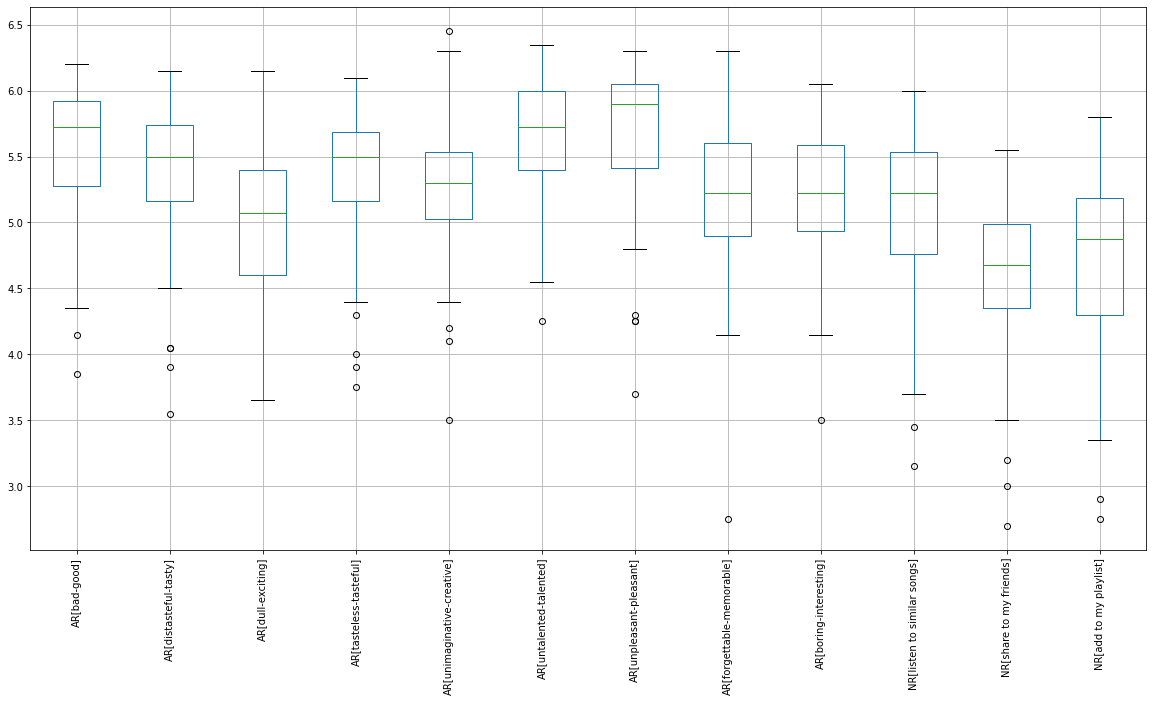

In [60]:
boxplot = crowdsource_pd_final.boxplot(column=['AR[bad-good]', 'AR[distasteful-tasty]', 'AR[dull-exciting]', 'AR[tasteless-tasteful]', 'AR[unimaginative-creative]', 'AR[untalented-talented]', 'AR[unpleasant-pleasant]', 'AR[forgettable-memorable]', 'AR[boring-interesting]', 'NR[listen to similar songs]', 'NR[share to my friends]', 'NR[add to my playlist]'], figsize=(20,10), rot=90)

In [61]:
# get std per row to see if people rated a song similarly (only AR&NR)

In [81]:
c_pd_check = crowdsource_pd_final[['AR[bad-good]', 'AR[distasteful-tasty]', 'AR[dull-exciting]', 'AR[tasteless-tasteful]', 'AR[unimaginative-creative]', 'AR[untalented-talented]', 'AR[unpleasant-pleasant]', 'AR[forgettable-memorable]', 'AR[boring-interesting]', 'NR[listen to similar songs]', 'NR[share to my friends]', 'NR[add to my playlist]']].std(axis=1)
c_pd_check

0     0.324971
1     0.319446
2     0.304853
3     0.475518
4     0.400639
5     0.566020
6     0.377793
7     0.614903
8     0.323423
9     0.456000
10    0.450820
11    0.474102
12    0.488252
13    0.477902
14    0.560235
15    0.458980
16    0.239634
17    0.738382
18    0.441309
19    0.456829
20    0.457182
21    0.419957
22    0.509456
23    0.521507
24    0.516306
25    0.531008
26    0.338446
27    0.489202
28    0.398933
29    0.415057
30    0.368941
31    0.272057
32    0.325669
33    0.509605
34    0.508265
35    0.531062
36    0.237888
37    0.344079
38    0.349892
39    0.334619
40    0.416879
41    0.292973
42    0.339340
43    0.301606
44    0.303015
45    0.381658
46    0.332233
47    0.330375
48    0.328795
49    0.366494
dtype: float64

In [82]:
print(str(c_pd_check.min())+" and "+str(c_pd_check.max()))
print(str(c_pd_check.mean()))

0.23788843832962772 and 0.7383822406676188
0.4144501922891466


In [74]:
c_pd_check = crowdsource_pd_final[['AR[bad-good]', 'AR[distasteful-tasty]', 'AR[dull-exciting]', 'AR[tasteless-tasteful]', 'AR[unimaginative-creative]', 'AR[untalented-talented]', 'AR[unpleasant-pleasant]', 'AR[forgettable-memorable]', 'AR[boring-interesting]']].std(axis=1)
print(str(c_pd_check.min())+" and "+str(c_pd_check.max()))

0.14790199457749043 and 0.5587063430620579


In [75]:
c_pd_check = crowdsource_pd_final[['NR[listen to similar songs]', 'NR[share to my friends]', 'NR[add to my playlist]']].std(axis=1)
print(str(c_pd_check.min())+" and "+str(c_pd_check.max()))

0.04999999999999982 and 0.5484827557301446


In [63]:
crowdsource_pd_final[['AR[bad-good]', 'AR[distasteful-tasty]', 'AR[dull-exciting]', 'AR[tasteless-tasteful]', 'AR[unimaginative-creative]', 'AR[untalented-talented]', 'AR[unpleasant-pleasant]', 'AR[forgettable-memorable]', 'AR[boring-interesting]', 'NR[listen to similar songs]', 'NR[share to my friends]', 'NR[add to my playlist]']].mean(axis=1)

0     5.033333
1     5.675000
2     5.854167
3     5.595833
4     5.687500
5     5.258333
6     5.850000
7     5.258333
8     5.162500
9     5.429167
10    5.062500
11    4.925000
12    5.845833
13    5.545833
14    3.975000
15    5.029167
16    5.883333
17    4.929167
18    5.170833
19    4.637500
20    5.341667
21    5.550000
22    5.300000
23    4.483333
24    4.529167
25    5.283333
26    5.200000
27    3.425000
28    5.237500
29    5.400000
30    4.154167
31    5.708333
32    5.466667
33    4.466667
34    5.466667
35    4.204167
36    5.475000
37    5.429167
38    4.983333
39    4.766667
40    4.516667
41    5.441667
42    5.433333
43    5.512500
44    5.850000
45    5.445833
46    5.608333
47    5.437500
48    5.608333
49    5.475000
dtype: float64

In [64]:
crowdsource_pd_final

,Song Name,Artist Name,Song Familiarity,Artist Familiarity,AR[bad-good],AR[distasteful-tasty],AR[dull-exciting],AR[tasteless-tasteful],AR[unimaginative-creative],AR[untalented-talented],AR[unpleasant-pleasant],AR[forgettable-memorable],AR[boring-interesting],NR[listen to similar songs],NR[share to my friends],NR[add to my playlist]
0,Kill Bill,SZA,4.75,4.05,5.25,4.95,4.35,4.85,5.15,5.45,5.35,5.10,5.25,5.25,4.60,4.85
1,Until I Found You (with Em Beihold) - Em Beiho...,"Stephen Sanchez, Em Beihold",6.50,3.00,6.05,5.85,5.20,5.65,5.45,5.70,6.15,5.95,5.55,5.90,5.15,5.50
2,THE SHADE,Rex Orange County,5.10,4.55,6.05,6.05,5.60,6.05,5.90,6.25,6.25,5.60,5.70,6.00,5.35,5.45
3,Glimpse of Us,Joji,5.70,4.70,6.15,5.75,4.70,5.50,5.85,6.10,6.05,5.85,5.75,5.45,5.00,5.00
4,OMG,NewJeans,5.55,4.90,5.80,5.65,5.95,5.80,6.05,6.10,5.95,5.55,6.00,5.55,4.95,4.90
5,Mahika,"Adie, Janine Berdin",4.15,3.55,5.95,5.50,4.65,5.20,5.25,6.15,6.10,5.10,5.20,4.80,4.65,4.55
6,Midnight Rain,Taylor Swift,5.60,6.85,6.05,5.65,5.70,5.85,6.45,6.35,6.05,6.10,5.85,5.60,5.15,5.40
7,Isa lang,Arthur Nery,3.95,4.60,5.75,5.75,5.05,5.75,5.45,6.05,6.00,4.80,4.90,4.95,4.35,4.30
8,I Wanna Be Yours,Arctic Monkeys,3.65,4.50,5.35,5.55,4.85,5.25,5.30,5.55,5.60,4.95,5.15,4.90,4.60,4.90
9,Yakap,Zack Tabuldo,4.85,4.80,5.75,5.85,5.20,5.65,5.25,6.15,6.05,5.25,5.30,5.10,4.70,4.90


In [65]:
# get songs rated highly per age range // cant bc not all songs were evaluated by each person

In [66]:
crowdsource_pd_final.to_csv('crowdsource_pd_final.csv', encoding='utf-8')
musicBg.to_csv('musicBg.csv', encoding='utf-8')

In [67]:
# check if avg for (tasteless-tasteful) and (distasteful-tasty) is similar